# 📊 **Análise Exploratória - Exepectativa de Vida Global**

# **1 - Visão Geral do Projeto**
Este projeto executa uma análise exploratória e preparação de dados a partir do conjunto Life Expectancy Data, disponível no Kaggle e baseado em dados da Organização Mundial da Saúde (OMS).

O objetivo é compreender a consistência do dataset e investigar fatores associados à expectativa de vida em diferentes países, preparando a base para análises estatísticas e modelos preditivos.

## **1.1 - Contexto dos Dados**

O dataset reúne indicadores demográficos, econômicos e de saúde pública relativos a países ao longo de múltiplos anos, o que permite analisar padrões temporais e regionais da expectativa de vida.

Fonte dos dados: Kaggle — Life Expectancy (WHO) "https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fkumarajarshi%2Flife-expectancy-who%2Fdata".

## **1.2 - Objetivo da Análise**

Avaliar a qualidade dos dados e realizar o processo de limpeza, padronização e diagnóstico inicial do dataset, criando uma base confiável para análises estatísticas subsequentes.

## **1.3 - Etapas Executadas**

As seguintes etapas foram realizadas:

1. Carregamento e inspeção inicial do dataset

2. Padronização dos nomes das variáveis

3. Diagnóstico de valores ausentes

4. Exclusão seletiva de países com baixa completude

5. Imputação de valores ausentes

6. Verificação de limites plausíveis

7. Análise e tratamento de outliers

## **1.4 - Ferramentas e Tecnologias Utilizadas**

Análise realizada em ambiente de notebook utilizando:

* Pandas

* NumPy

* Matplotlib

* Seaborn

* SciPy

* re

* geopandas 

## 📑 **1.5 - Dicionário de dados**

| Nome da Variável                           | Descrição                                                                 |
|--------------------------------------------|---------------------------------------------------------------------------|
| **Country (País)**                         | Nome da entidade geográfica ou país.                                      |
| **Year (Ano)**                             | Ano de registro dos dados, abrangendo de 2000 a 2015.                     |
| **Status**                                 | Status de desenvolvimento do país.                                        |
| **Life expectancy (Expectativa de Vida)**  | Expectativa de vida em anos.                                              |
| **Adult Mortality (Mortalidade Adulta)**   | Taxa de mortalidade adulta para ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes). |
| **Infant deaths (Mortes Infantis)**        | Número de mortes de crianças menores de 1 ano por 1000 habitantes.        |
| **Alcohol (Álcool)**                       | Consumo registrado de álcool per capita (indivíduos com 15 anos ou mais, em litros de álcool puro). |
| **Percentage expenditure (Despesa em %)**  | Despesa com saúde como porcentagem do Produto Interno Bruto (PIB) per capita. |
| **Hepatitis B (Hepatite B)**               | Cobertura de imunização contra Hepatite B (HepB) em crianças de 1 ano (%). |
| **Measles (Sarampo)**                      | Número de casos de sarampo notificados por 1000 habitantes.               |
| **BMI (IMC)**                              | Índice de Massa Corporal médio da população adulta (peso em kg dividido pela altura em m²). |
| **Under-five deaths (Mortes < 5 anos)**    | Número de mortes de crianças menores de 5 anos por 1000 habitantes.       |
| **Polio**                                  | Cobertura de imunização contra Poliomielite (%).                          |
| **Total expenditure (Despesa Total)**      | Despesa total do governo com saúde (% do PIB).                            |
| **Diphtheria (Difteria)**                  | Cobertura de imunização contra Difteria (%).                              |
| **HIV/AIDS**                               | Casos reportados de HIV/AIDS.                                             |
| **GDP (PIB)**                              | Produto Interno Bruto per capita (possivelmente ajustado pela paridade do poder de compra). |
| **Population (População)**                 | População total do país.                                                  |
| **Thinness 1-19 years (Magreza 1-19 anos)**| Prevalência de magreza entre jovens de 1 a 19 anos (%).                   |
| **Thinness 5-9 years (Magreza 5-9 anos)**  | Prevalência de magreza entre crianças de 5 a 9 anos (%).                  |
| **Income composition of resources (Composição da Renda)** | Índice composto que mede a composição da renda e dos recursos (proxy para o IDH). |
| **Schooling (Escolaridade)**               | Média de anos de escolaridade da população.                               |


# **2 - Início da Análise**

## **2.1 - Importação de Bibliotecas e Carregamento de Dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import re
import geopandas as gpd

In [9]:
# Caminho relativo permite executar o notebook fora do Colab
#df_raw = pd.read_csv("../data/raw/Life Expectancy Data.csv", sep=";")
df_raw = pd.read_csv(r"C:\Portifolio\projeto_limpeza_de_dados\Life Expectancy Data.csv", sep=";")
df_raw.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Switzerland,2014,Developed,83.2,51.0,0,9.61,19479.91161,NaN,23,...,96.0,11.66,96.0,0.1,85814.58857,8188649.0,0.4,0.3,0.936,15.9
1,Switzerland,2013,Developed,83.0,52.0,0,9.73,19099.04506,NaN,175,...,96.0,11.71,96.0,0.1,84658.88768,889346.0,0.4,0.3,0.934,15.8
2,Luxembourg,2008,Developed,80.0,8.0,0,11.53,18961.34860,94.0,1,...,96.0,7.34,99.0,0.1,114293.84330,48865.0,0.9,0.9,0.887,13.5
3,Switzerland,2011,Developed,82.6,55.0,0,9.99,18822.86732,NaN,621,...,96.0,11.21,96.0,0.1,87998.44468,7912398.0,0.5,0.3,0.932,15.6
4,Switzerland,2012,Developed,82.7,54.0,0,9.86,18379.32974,NaN,61,...,96.0,11.59,96.0,0.1,83164.38795,7996861.0,0.5,0.3,0.932,15.7


In [10]:
df_raw.shape

(2938, 22)

In [11]:
numero_paises = df_raw["Country"].nunique()
print(f"O dataset contém dados de {numero_paises} países.")


O dataset contém dados de 193 países.


In [12]:
numero_anos = len(df_raw['Year'].unique())

print(f"O dataframe contém {numero_anos} anos de dados")
print(f"\nOs anos variam de {df_raw['Year'].min()} a {df_raw['Year'].max()}")

O dataframe contém 16 anos de dados

Os anos variam de 2000 a 2015


A base contém dados de **193 países**, organizados em uma série temporal de **16 anos**, com **20 variáveis quantitativas**, além das colunas identificadoras *Country* e *Year*.

Para evitar modificações acidentais na base original, será criada uma cópia do dataset para realização das análises.

In [13]:
# Criação de uma cópia para presenvar o dataset original
df = df_raw.copy()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Switzerland,2014,Developed,83.2,51.0,0,9.61,19479.91161,NaN,23,...,96.0,11.66,96.0,0.1,85814.58857,8188649.0,0.4,0.3,0.936,15.9
1,Switzerland,2013,Developed,83.0,52.0,0,9.73,19099.04506,NaN,175,...,96.0,11.71,96.0,0.1,84658.88768,889346.0,0.4,0.3,0.934,15.8
2,Luxembourg,2008,Developed,80.0,8.0,0,11.53,18961.34860,94.0,1,...,96.0,7.34,99.0,0.1,114293.84330,48865.0,0.9,0.9,0.887,13.5
3,Switzerland,2011,Developed,82.6,55.0,0,9.99,18822.86732,NaN,621,...,96.0,11.21,96.0,0.1,87998.44468,7912398.0,0.5,0.3,0.932,15.6
4,Switzerland,2012,Developed,82.7,54.0,0,9.86,18379.32974,NaN,61,...,96.0,11.59,96.0,0.1,83164.38795,7996861.0,0.5,0.3,0.932,15.7


## **2.2 - Configurações globais de exibição**

Essas configurações ajustam apenas a forma como os dados são exibidos no notebook, não alterando os valores reais do dataset. 


In [14]:
pd.set_option('display.precision', 3) 

pd.set_option('display.max_columns', None) 

pd.set_option('display.max_rows', 100) 

## **2.3 - Diangóstico Inicial dos Dados**


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### A inspeção da estrutura do dataset revela:

### Estrutura geral
- 2.938 registros
- 22 variáveis

### Tipos de dados
- 16 colunas numéricas (`float` e `int`)
- 2 colunas categóricas (`object`)
- 4 colunas inteiras representando contagens

### Observações relevantes

**Padronização de nomes**  
Algumas colunas possuem espaços e caracteres especiais, o que dificulta o uso programático. Esses nomes serão normalizados.

**Variáveis categóricas**  
As colunas `Country` e `Status` serão convertidas para o tipo `category` após normalização de texto.

**Ano (`Year`)**  
Apesar de estar no formato numérico, representa uma variável temporal discreta. Para a etapa exploratória, o tipo inteiro será mantido.

**Possíveis inconsistências conceituais**  
Algumas variáveis aparecem como inteiras, embora representem taxas. Este ponto será apenas documentado, sem correção nesta etapa.

**Variável alvo**  
`Life expectancy` será considerada a variável resposta.




### **2.3.1 - Padronização das Variáveis**

As seguintes transformações serão aplicadas:

1. Normalização dos nomes das colunas  
2. Padronização textual das variáveis categóricas  
3. Conversão de tipos para `category`

In [16]:
# Padronização dos nomes das colunas
df.columns = (
    df.columns
      .str.strip()
      .str.replace("[^a-zA-Z0-9_]", "_", regex=True)
      .str.replace("__+", "_", regex=True)
      .str.replace("/", "_", regex=True)
      .str.strip("_")
      .str.lower()
)


In [17]:
# Normalização de texto nas variáveis categóricas
df["country"] = df["country"].str.strip().str.lower()
df["status"] = df["status"].str.strip().str.lower()

# Conversão de tipo
df["country"] = df["country"].astype("category")
df["status"] = df["status"].astype("category")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   country                          2938 non-null   category
 1   year                             2938 non-null   int64   
 2   status                           2938 non-null   category
 3   life_expectancy                  2928 non-null   float64 
 4   adult_mortality                  2928 non-null   float64 
 5   infant_deaths                    2938 non-null   int64   
 6   alcohol                          2744 non-null   float64 
 7   percentage_expenditure           2938 non-null   float64 
 8   hepatitis_b                      2385 non-null   float64 
 9   measles                          2938 non-null   int64   
 10  bmi                              2904 non-null   float64 
 11  under_five_deaths                2938 non-null   int64   
 12  polio 

### **2.3.2 - Verificação de Registros  Duplicados**

In [19]:
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

Número de registros duplicados: 0


### **2.3.3 - Seleção de Variáveis Numéricas**

Para algumas análises estatísticas, será criado um subconjunto apenas com variáveis numéricas.


In [20]:
df_numerico = df.select_dtypes(include=["number"])
df_numerico.head()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,2014,83.2,51.0,0,9.61,19479.912,NaN,23,57.0,0,96.0,11.66,96.0,0.1,85814.589,8.189e+06,0.4,0.3,0.936,15.9
1,2013,83.0,52.0,0,9.73,19099.045,NaN,175,56.6,0,96.0,11.71,96.0,0.1,84658.888,8.893e+05,0.4,0.3,0.934,15.8
2,2008,80.0,8.0,0,11.53,18961.349,94.0,1,58.4,0,96.0,7.34,99.0,0.1,114293.843,4.886e+04,0.9,0.9,0.887,13.5
3,2011,82.6,55.0,0,9.99,18822.867,NaN,621,55.8,0,96.0,11.21,96.0,0.1,87998.445,7.912e+06,0.5,0.3,0.932,15.6
4,2012,82.7,54.0,0,9.86,18379.330,NaN,61,56.2,0,96.0,11.59,96.0,0.1,83164.388,7.997e+06,0.5,0.3,0.932,15.7


# **3 - Avaliação da Qualidade dos Dados**

A qualidade da base foi avaliada considerando:

- Valores ausentes (NaN)
- Valores fora de limites plausíveis
- Completude temporal por país

As análises foram conduzidas em três níveis:

- Por variável
- Por país
- Por ano

O objetivo é identificar quais dimensões da base comprometem a confiabilidade das análises e devem ser tratadas ou removidas.

## **3.1 - Completude da Série Temporal por País**

Como a base possui 16 anos (2000 a 2015), é esperado que países apresentem esse intervalo completo.



In [21]:
completude = (
    df.groupby("country", observed=True)["year"]
      .nunique()
      .reset_index(name="anos_disponiveis")
)

incompletos = completude[completude["anos_disponiveis"] < 16]

print(f"Países com série temporal incompleta: {incompletos.shape[0]}")


Países com série temporal incompleta: 10


In [22]:
tabela_paises_incompletos = incompletos.sort_values(
    by="anos_disponiveis", ascending=True
)

print("Páises com série temporal incompleta:")
tabela_paises_incompletos

Páises com série temporal incompleta:


,country,anos_disponiveis
38,cook islands,1
49,dominica,1
105,marshall islands,1
110,monaco,1
117,nauru,1
124,niue,1
128,palau,1
142,saint kitts and nevis,1
146,san marino,1
178,tuvalu,1


In [23]:
paises_incompletos = tabela_paises_incompletos["country"]

df_incompletos = df[df["country"].isin(paises_incompletos)]
df_incompletos

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
456,marshall islands,2013,developing,NaN,NaN,0,0.01,871.878,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752,NaN,0.1,0.1,NaN,0.0
834,palau,2013,developing,NaN,NaN,0,NaN,344.691,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122,292.0,0.1,0.1,0.779,14.2
1393,tuvalu,2013,developing,NaN,NaN,0,0.01,78.281,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.136,1819.0,0.2,0.1,NaN,0.0
1985,nauru,2013,developing,NaN,NaN,0,0.01,15.607,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183,NaN,0.1,0.1,NaN,9.6
2042,dominica,2013,developing,NaN,NaN,0,0.01,11.420,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.757,NaN,2.7,2.6,0.721,12.7
2424,cook islands,2013,developing,NaN,NaN,0,0.01,0.000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
2638,monaco,2013,developing,NaN,NaN,0,0.01,0.000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2651,niue,2013,developing,NaN,NaN,0,0.01,0.000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
2698,saint kitts and nevis,2013,developing,NaN,NaN,0,8.54,0.000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2732,san marino,2013,developing,NaN,NaN,0,0.01,0.000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1


Registros, como dos dez países que possuem apenas um ano na série temporal, inviabilizam análises temporais e não contribuem para modelagem consistente.

**Decisão**:

Os países com apenas um ano de dados serão removidos da base, pois:

- não permitem análise longitudinal
- possuem alta ausência de dados críticos, inclusive para a variável alvo (*life_expectancy*)
- inviabilizam comparação entre países


Remoção das linhas dos países com menos de 16 anos de dados

In [24]:
print("Antes da exclusão:", df.shape)

df = df[~df["country"].isin(paises_incompletos)]

print("Depois da exclusão:", df.shape)
print("Países restantes:", df["country"].nunique())

Antes da exclusão: (2938, 22)
Depois da exclusão: (2928, 22)
Países restantes: 183


## **3.2 - Valores Ausentes e Fora dos Limites**

Foi realizada a verificação automática de:

- valores nulos
- valores fora de intervalos plausíveis


In [25]:
limites = {
    "life_expectancy": (0, 100),
    "adult_mortality": (0, 1000),
    "infant_deaths": (0, 1000),
    "alcohol": (0, None),
    "percentage_expenditure": (0, 100),
    "hepatitis_b": (0, 100),
    "measles": (0, 1000),
    "bmi": (10, 50),
    "under_five_deaths": (0, 1000),
    "polio": (0, 100),
    "total_expenditure": (0, 100),
    "diphtheria": (0, 100),
    "hiv_aids": (0, 100),
    "gdp": (0, None),
    "population": (0, None),
    "thinness_1_19_years": (0, 100),
    "thinness_5_9_years": (0, 100),
    "income_composition_of_resources": (0, 1),
    "schooling": (0, 25),
}

In [ ]:
def avaliar_variaveis(df, limites):
"""
    Avalia variáveis de um DataFrame em relação a limites definidos e retorna um resumo.

    Para cada variável especificada em `limites`, a função calcula:
    - Quantos valores estão fora dos limites mínimos e máximos.
    - Quantos valores são nulos.
    - O total de valores problemáticos (fora dos limites + nulos).
    - O percentual desses valores em relação ao total de linhas.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo as variáveis a serem avaliadas.
    limites : dict
        Dicionário no formato {variável: (min_val, max_val)}.
        Use None para ignorar limite mínimo ou máximo.

    Retorna
    -------
    pandas.DataFrame
        DataFrame resumo com colunas:
        - "Variável"
        - "Fora dos limites"
        - "Nulos"
        - "Total"
        - "Percentual (%)"
    """
    resultados = []

    for var, (min_val, max_val) in limites.items():
        if var not in df.columns:
            continue

        fora_min = df[var] < min_val if min_val is not None else False
        fora_max = df[var] > max_val if max_val is not None else False

        fora = (fora_min | fora_max).sum()
        nulos = df[var].isna().sum()
        total = fora + nulos
        perc = (total / len(df)) * 100

        resultados.append({
            "Variável": var,
            "Fora dos limites": fora,
            "Nulos": nulos,
            "Total": total,
            "Percentual (%)": round(perc, 2)
        })

    return pd.DataFrame(resultados)

In [27]:
tabela_qualidade = avaliar_variaveis(df, limites)
tabela_qualidade.sort_values("Total", ascending=False)

,Variável,Fora dos limites,Nulos,Total,Percentual (%)
7,bmi,1414,32,1446,49.39
4,percentage_expenditure,1301,0,1301,44.43
14,population,0,644,644,21.99
5,hepatitis_b,0,553,553,18.89
6,measles,525,0,525,17.93
13,gdp,0,443,443,15.13
10,total_expenditure,0,226,226,7.72
3,alcohol,0,193,193,6.59
17,income_composition_of_resources,0,160,160,5.46
18,schooling,0,160,160,5.46


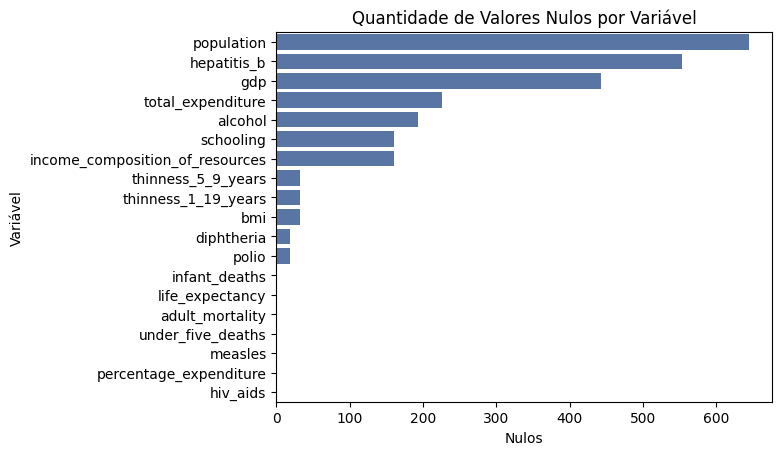

In [28]:
# Gráfico valore nulos por variável
sns.barplot(
    data=tabela_qualidade.sort_values("Nulos", ascending=False),
    x="Nulos",
    y="Variável",
    color="#4C72B0"
)
plt.title("Quantidade de Valores Nulos por Variável")
plt.show()


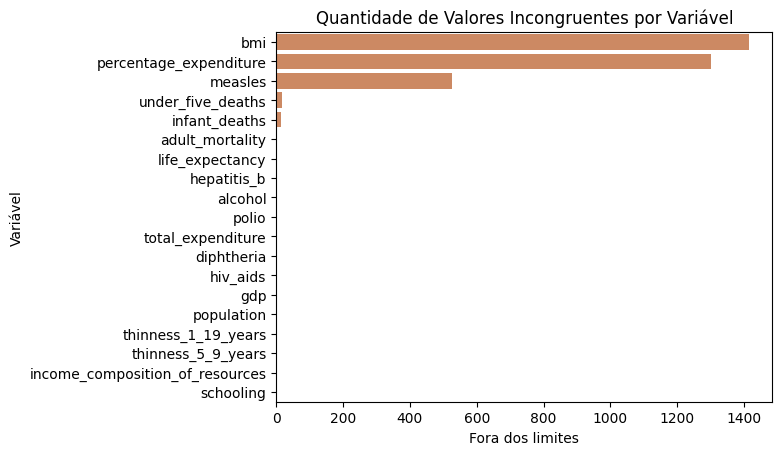

In [29]:
# Gráfico valores fora dos limites por variável
sns.barplot(
    data=tabela_qualidade.sort_values("Fora dos limites", ascending=False),
    x="Fora dos limites",
    y="Variável",
    color="#DD8452"
)
plt.title("Quantidade de Valores Incongruentes por Variável")
plt.show()

**Análise dos Resultados**

Variáveis críticas:
- `bmi` (~50%)
- `percentage_expenditure` (~44%)

Variáveis com impacto relevante:
- `population`, `hepatitis_b`, `measles`, `gdp`

Variáveis estáveis:
- `life_expectancy`, `adult_mortality`, `thinness`, `hiv_aids`

**Diretrizes**

- Variáveis acima de 30% de problemas serão descartadas.
- Variáveis abaixo de 30% poderão ser imputadas.


### **3.2.2.1 - Análise das Variáveis Críticas (*bmi* e *percentage_expenditure*)**

Esta etapa investiga variáveis com alta taxa de inconsistência apontadas na auditoria de qualidade.

O objetivo é verificar se os desvios observados são corrigíveis por transformação de escala ou se representam erros estruturais que inviabilizam o uso dos dados.

📊 **Visualização das distribuições**

**Histogramas**

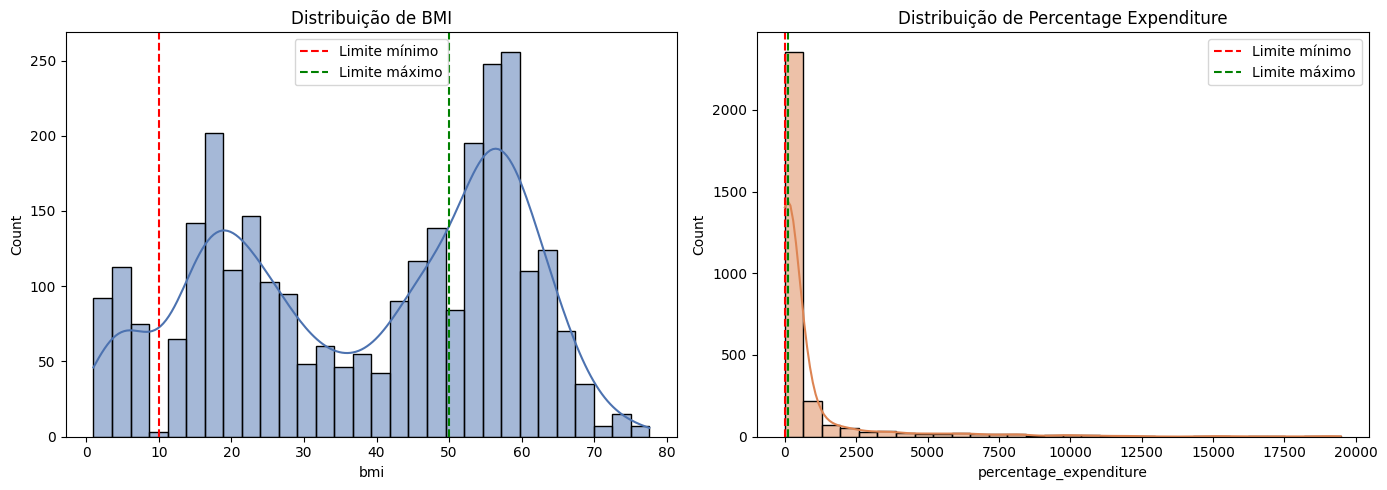

In [30]:
# 3.2.2.1 - Análise de variáveis críticas: bmi e percentage_expenditure

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de BMI
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Distribuição de BMI")
axes[0].axvline(limites['bmi'][0], color='red', linestyle='--', label='Limite mínimo')
axes[0].axvline(limites['bmi'][1], color='green', linestyle='--', label='Limite máximo')
axes[0].legend()

# Histograma de Percentage Expenditure
sns.histplot(df['percentage_expenditure'], bins=30, kde=True, ax=axes[1], color="#DD8452")
axes[1].set_title("Distribuição de Percentage Expenditure")
axes[1].axvline(limites['percentage_expenditure'][0], color='red', linestyle='--', label='Limite mínimo')
axes[1].axvline(limites['percentage_expenditure'][1], color='green', linestyle='--', label='Limite máximo')
axes[1].legend()

plt.tight_layout()
plt.show()


**Boxplots (detecção de outliers e valores extremos)**

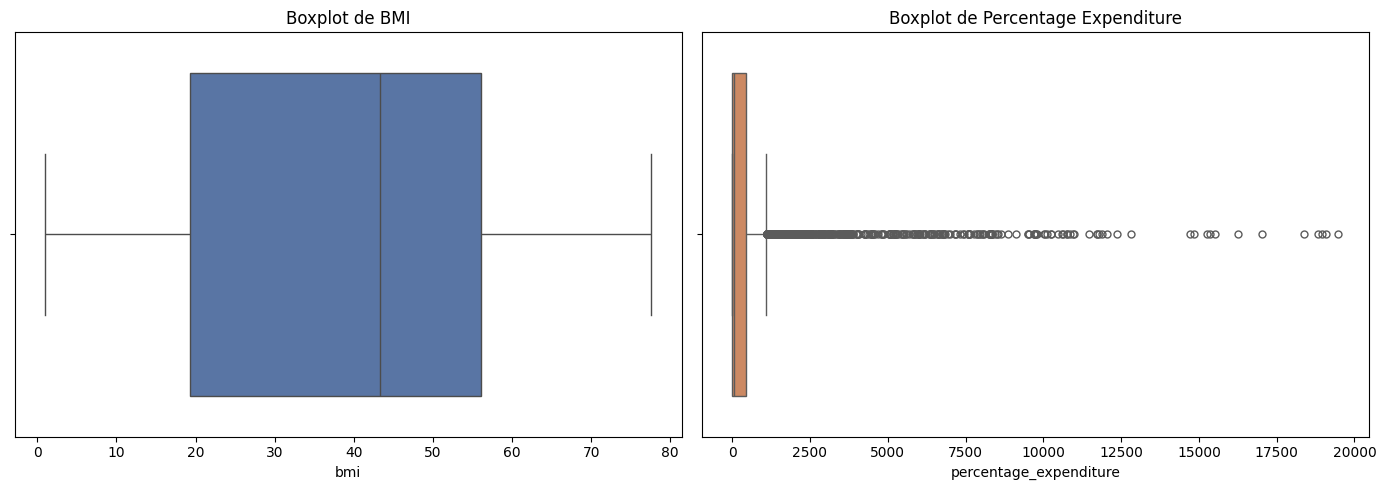

In [31]:
# Boxplots para evidenciar outliers

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df['bmi'], ax=axes[0], color="#4C72B0", fliersize=5)
axes[0].set_title("Boxplot de BMI")

sns.boxplot(x=df['percentage_expenditure'], ax=axes[1], color="#DD8452", fliersize=5)
axes[1].set_title("Boxplot de Percentage Expenditure")

plt.tight_layout()
plt.show()

 **Interpretação técnica**

Variável bmi

* Valores ultrapassam limites fisiologicamente plausíveis (10–50).

* Observam-se valores absurdamente baixos e extremamente elevados.

* O padrão não indica erro de escala único.

✔️ Conclusão: inconsistência estrutural — variável inviável para uso analítico.


Variável percentage_expenditure

* Valores chegam a quase 200.000%, incompatíveis com a medida.

* Existe mistura entre escalas corretas e absurdas.

* Não é possível aplicar transformação global sem distorcer observações válidas.

✔️ Conclusão: variável corrompida por erro de origem.

✅ **Decisão:**

Como ambas as variáveis apresentam problemas sistêmicos e não corrigíveis sem fonte externa confiável, serão removidas.



**Remoção das variáveis do DataFrame**

In [32]:
# Exclusão das variáveis críticas
df_clean = df.drop(columns=['bmi', 'percentage_expenditure'])

print("Dimensão após remoção:")
print(df_clean.shape)

print("\nColunas restantes:")
df_clean.columns.tolist()

Dimensão após remoção:
(2928, 20)

Colunas restantes:


['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'hepatitis_b',
 'measles',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness_1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

### **3.2.2.2 - Análise das Variáveis com Problemas Moderados (*population, gdp, measles e hepatitis_b*)**

Variáveis com até 30% de problemas podem ser candidatas à imputação, desde que:

* não apresentem séries completamente nulas,

* inconsistências não sejam sistêmicas,

* haja variação real entre países.

### **3.2.2.2.1 — population (problema: valores nulos)**

**Países com mais ausências**

In [33]:
df_clean.groupby('country', observed=True)['population'].apply(
            lambda x: x.isna().sum()
            ).sort_values(ascending=False).head(20)

country
antigua and barbuda                      16
bahrain                                  16
bahamas                                  16
bolivia (plurinational state of)         16
barbados                                 16
congo                                    16
brunei darussalam                        16
cuba                                     16
czechia                                  16
democratic people's republic of korea    16
côte d'ivoire                            16
democratic republic of the congo         16
egypt                                    16
saint vincent and the grenadines         16
micronesia (federated states of)         16
kuwait                                   16
kyrgyzstan                               16
lao people's democratic republic         16
libya                                    16
new zealand                              16
Name: population, dtype: int64

**Quantidade total de países afetados**

In [34]:
numero_paises_nulos_population = df_clean.groupby('country', observed=True)['population'].apply(
            lambda x: x.isna().any()
).sum()

print(f'{numero_paises_nulos_population} países possuem pelo menos um valor nulo em population')

41 países possuem pelo menos um valor nulo em population


**Distribuição gráfica**

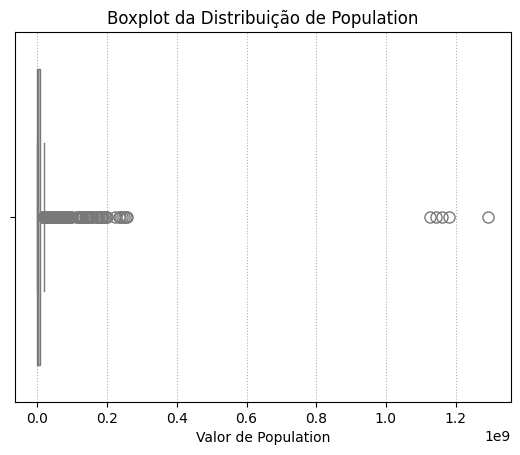

In [35]:
ax = sns.boxplot(x=df_clean['population'], color='lightblue', fliersize=8)

plt.title("Boxplot da Distribuição de Population")
plt.xlabel("Valor de Population")
plt.grid(True, axis='x', linestyle=':')
plt.show()

In [36]:
df_clean[df_clean['population'].isna()]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
32,new zealand,2013,developed,81.3,69.0,0,9.18,93.0,8,0,92.0,11.17,92.0,0.1,42889.881,NaN,0.3,0.3,0.908,19.3
50,new zealand,2011,developed,86.0,72.0,0,9.47,95.0,597,0,95.0,11.24,95.0,0.1,38426.558,NaN,0.3,0.3,0.901,19.7
59,singapore,2014,developed,82.9,56.0,0,1.83,96.0,0,0,96.0,4.92,96.0,0.1,56336.723,NaN,2.2,2.2,0.922,15.4
81,new zealand,2008,developed,81.0,75.0,0,9.49,9.0,0,0,89.0,1.70,89.0,0.1,31287.779,NaN,0.3,0.3,0.894,19.5
84,new zealand,2010,developed,89.0,71.0,0,9.62,9.0,43,0,93.0,11.20,93.0,0.1,33691.348,NaN,0.3,0.3,0.899,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,yemen,2004,developing,62.2,247.0,42,0.06,43.0,12708,56,72.0,4.90,72.0,0.1,NaN,NaN,13.9,13.9,0.464,8.4
2927,yemen,2003,developing,61.9,249.0,43,0.04,38.0,8536,58,61.0,5.00,61.0,0.1,NaN,NaN,14.0,13.9,0.457,8.2
2928,yemen,2002,developing,61.5,25.0,45,0.07,31.0,890,61,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
2929,yemen,2001,developing,61.1,251.0,46,0.08,19.0,485,63,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9


📌 **Conclusão:** há países inteiros sem registros — imputação inviável nesses casos.

### **3.2.2.2.2 - hepatitis_b (problema: valores nulos)** 

In [37]:
df_clean.groupby('country', observed=True)['hepatitis_b'].apply(
    lambda x: x.isna().sum()
).sort_values(ascending=False).head(20)

country
denmark                                                 16
united kingdom of great britain and northern ireland    16
switzerland                                             16
hungary                                                 16
iceland                                                 16
japan                                                   16
finland                                                 16
norway                                                  16
slovenia                                                16
south sudan                                             15
equatorial guinea                                       14
haiti                                                   13
somalia                                                 13
sweden                                                  11
netherlands                                             11
namibia                                                 10
ireland                                         

In [38]:
num_hep_nulos = df_clean.groupby('country', observed=True)['hepatitis_b'].apply(
    lambda x: x.isna().any()
).sum()

print(f"{num_hep_nulos} países possuem ao menos um valor nulo em hepatitis_b")

98 países possuem ao menos um valor nulo em hepatitis_b


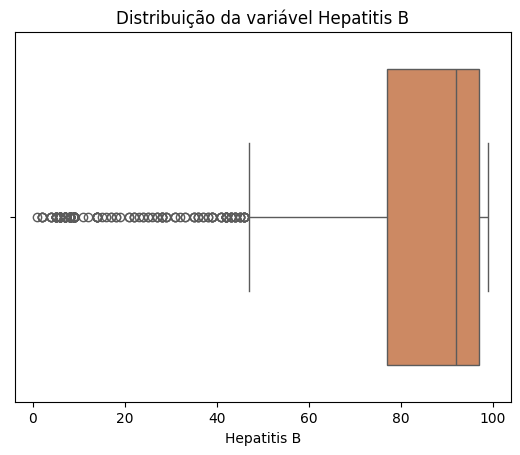

In [39]:
sns.boxplot(x=df_clean['hepatitis_b'], color="#DD8452", fliersize=6)
plt.title("Distribuição da variável Hepatitis B")
plt.xlabel("Hepatitis B")
plt.show()

In [40]:
df_clean[df_clean['hepatitis_b'].isna()].head(20)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,switzerland,2014,developed,83.2,51.0,0,9.61,NaN,23,0,96.0,11.66,96.0,0.1,85814.589,8.189e+06,0.4,0.3,0.936,15.9
1,switzerland,2013,developed,83.0,52.0,0,9.73,NaN,175,0,96.0,11.71,96.0,0.1,84658.888,8.893e+05,0.4,0.3,0.934,15.8
3,switzerland,2011,developed,82.6,55.0,0,9.99,NaN,621,0,96.0,11.21,96.0,0.1,87998.445,7.912e+06,0.5,0.3,0.932,15.6
4,switzerland,2012,developed,82.7,54.0,0,9.86,NaN,61,0,96.0,11.59,96.0,0.1,83164.388,7.997e+06,0.5,0.3,0.932,15.7
9,norway,2010,developed,81.0,66.0,0,6.59,NaN,3,0,93.0,9.26,93.0,0.1,87646.753,4.889e+06,0.7,0.7,0.936,17.4
10,norway,2007,developed,85.0,67.0,0,6.60,NaN,0,0,93.0,8.58,93.0,0.1,85128.658,4.792e+05,0.7,0.7,0.934,17.6
11,switzerland,2009,developed,82.1,6.0,0,10.15,NaN,958,0,96.0,11.00,95.0,0.1,69672.471,7.744e+06,0.5,0.4,0.916,15.3
12,norway,2006,developed,84.0,7.0,0,6.47,NaN,0,0,94.0,8.43,94.0,0.1,74114.697,4.667e+05,0.8,0.7,0.931,17.5
14,iceland,2007,developed,81.3,59.0,0,7.53,NaN,0,0,97.0,8.75,97.0,0.1,68348.318,3.116e+05,0.9,0.9,0.887,18.2
15,switzerland,2007,developed,81.7,63.0,0,10.44,NaN,1015,0,94.0,1.21,94.0,0.1,63223.468,7.551e+06,0.5,0.4,0.911,15.3


📌 **Conclusão:** há países inteiros sem registros — imputação inviável nesses casos.

### **3.2.2.2.3 — gdp (problema: valores nulos)** 

In [41]:
df_clean.groupby('country', observed=True)['gdp'].apply(
    lambda x: x.isna().sum()
).sort_values(ascending=False).head(20)

country
bahamas                                                 16
bolivia (plurinational state of)                        16
côte d'ivoire                                           16
egypt                                                   16
democratic republic of the congo                        16
democratic people's republic of korea                   16
congo                                                   16
czechia                                                 16
republic of korea                                       16
saint vincent and the grenadines                        16
saint lucia                                             16
slovakia                                                16
yemen                                                   16
united kingdom of great britain and northern ireland    16
the former yugoslav republic of macedonia               16
viet nam                                                16
united states of america                        

In [42]:
num_gdp_nulos = df_clean.groupby('country', observed=True)['gdp'].apply(
    lambda x: x.isna().any()
).sum()

print(f"{num_gdp_nulos} países possuem dados ausentes em gdp")

33 países possuem dados ausentes em gdp


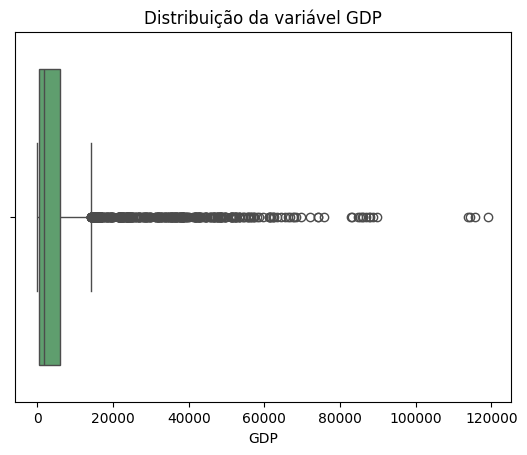

In [43]:
sns.boxplot(x=df_clean['gdp'], color="#55A868", fliersize=6)
plt.title("Distribuição da variável GDP")
plt.xlabel("GDP")
plt.show()

📌 **Conclusão:** inconsistência grave — vários países sem nenhuma observação.

### **3.2.2.2.4 — measles (problema: incongruência sistêmica)** 

**Contagem de valores fora do lmite por país**

In [44]:
min_val, max_val = limites['measles']

fora = (df_clean['measles'] < min_val) | (df_clean['measles'] > max_val)

df_clean[fora].groupby('country', observed=True)['measles'].count().sort_values(ascending=False).head(10)

country
china                               16
india                               16
indonesia                           16
democratic republic of the congo    15
nigeria                             15
nepal                               14
pakistan                            14
thailand                            14
ethiopia                            13
afghanistan                         12
Name: measles, dtype: int64

**Visualização da distorção**

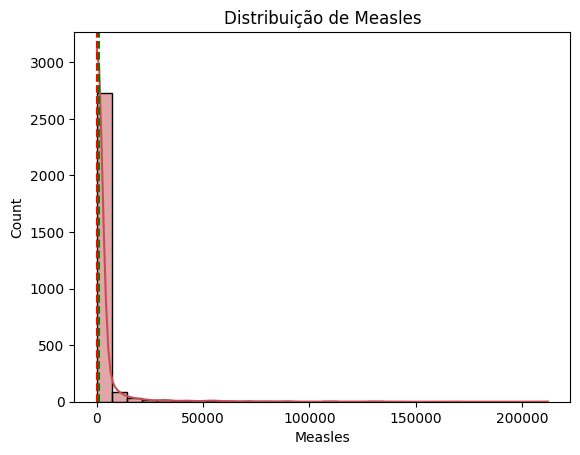

In [45]:
sns.histplot(df_clean['measles'], bins=30, kde=True, color="#C44E52")
plt.axvline(min_val, color="red", linestyle="--")
plt.axvline(max_val, color="green", linestyle="--")
plt.title("Distribuição de Measles")
plt.xlabel("Measles")
plt.show()


✅ **Decisão técnica**

measles apresenta erro sistêmico com muitos países totalmente fora dos limites.

**Decisão:** Exclusão da variável.


**Remoção da variável *measles***

In [46]:
df_filtered = df_clean.drop(columns=['measles'])

df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   country                          2928 non-null   category
 1   year                             2928 non-null   int64   
 2   status                           2928 non-null   category
 3   life_expectancy                  2928 non-null   float64 
 4   adult_mortality                  2928 non-null   float64 
 5   infant_deaths                    2928 non-null   int64   
 6   alcohol                          2735 non-null   float64 
 7   hepatitis_b                      2375 non-null   float64 
 8   under_five_deaths                2928 non-null   int64   
 9   polio                            2909 non-null   float64 
 10  total_expenditure                2702 non-null   float64 
 11  diphtheria                       2909 non-null   float64 
 12  hiv_aids   

### **3.2.2.3 - Analise dos Valores fora dos intervalos de *infant_deaths* e *under_five_deaths***

**Histogramas**

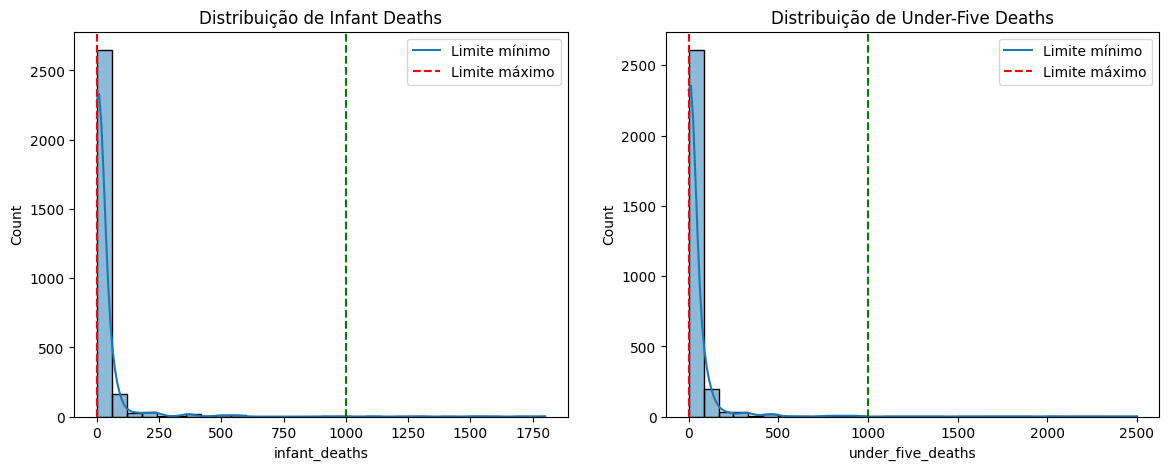

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Infant deaths

sns.histplot(df_filtered['infant_deaths'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribuição de Infant Deaths')
axes[0].axvline(limites['infant_deaths'][0], linestyle='--', color='red', label='Limite mínimo')
axes[0].axvline(limites['infant_deaths'][1], linestyle='--', color='green', label='Limite máximo')
axes[0].legend(['Limite mínimo','Limite máximo'])

# Under-five deaths

sns.histplot(df_filtered['under_five_deaths'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribuição de Under-Five Deaths')
axes[1].axvline(limites['under_five_deaths'][0], linestyle='--', color='red', label='Limite mínimo')
axes[1].axvline(limites['under_five_deaths'][1], linestyle='--', color='green', label='Limite máximo')
axes[1].legend(['Limite mínimo','Limite máximo'])

plt.show()

**Boxplots**

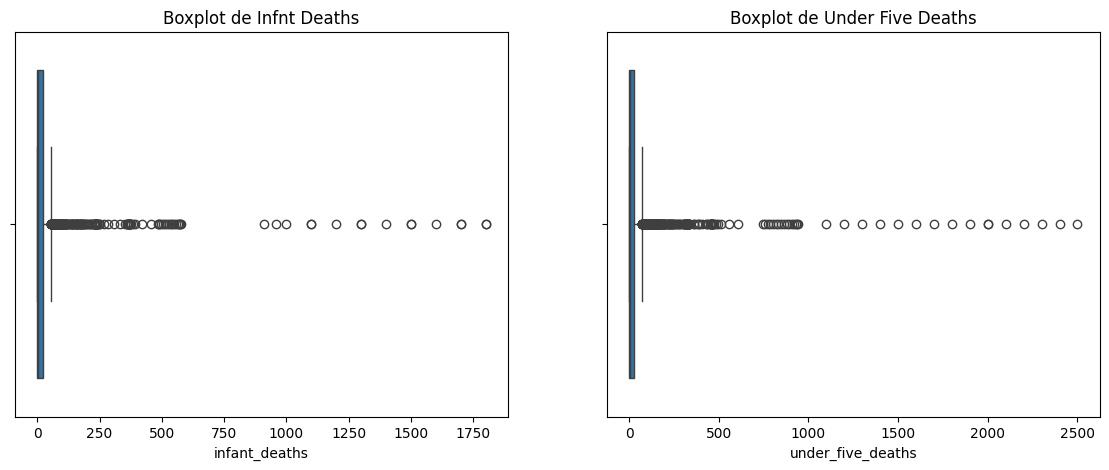

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Infant deaths
sns.boxplot(x=df_filtered['infant_deaths'], ax=axes[0]) 
axes[0].set_title("Boxplot de Infnt Deaths")

# Under-five deaths
sns.boxplot(x=df_filtered['under_five_deaths'], ax=axes[1]) 
axes[1].set_title("Boxplot de Under Five Deaths")

plt.show()

📌 **Conclusão:** inconsistências com valores acima dos máximos esperados

**Decisão:** checar os dados fora dos intervalos para uma melhor compreensão

In [49]:
df_filtered[df_filtered['under_five_deaths'] > 1000]
df_filtered[df_filtered['infant_deaths'] > 1000]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1468,india,2012,developing,67.3,19.0,1100,3.10,73.0,1400,79.0,4.39,82.0,0.2,1446.985,1.264e+08,26.9,27.6,0.590,11.3
1471,india,2011,developing,66.8,193.0,1100,3.00,44.0,1500,79.0,4.33,82.0,0.2,1461.672,1.247e+08,26.9,27.7,0.580,10.8
1536,india,2010,developing,66.4,196.0,1200,2.77,38.0,1600,76.0,4.28,79.0,0.2,1345.772,1.240e+07,27.0,27.8,0.569,10.4
1662,india,2008,developing,65.5,23.0,1300,1.93,29.0,1800,69.0,4.34,7.0,0.3,991.485,1.197e+08,27.0,27.9,0.556,10.2
1759,india,2006,developing,64.8,28.0,1500,1.37,6.0,2000,66.0,4.25,65.0,0.3,792.260,1.162e+09,27.1,28.0,0.536,9.7
1839,india,2004,developing,64.0,214.0,1600,1.20,6.0,2100,58.0,4.22,63.0,0.3,621.318,1.126e+09,27.2,28.2,0.518,9.2
1938,india,2003,developing,63.7,216.0,1700,1.19,NaN,2200,57.0,4.30,61.0,0.3,541.135,1.183e+07,27.3,28.3,0.505,8.6
1939,india,2000,developing,62.5,224.0,1800,0.93,NaN,2500,57.0,4.26,58.0,0.3,438.865,1.536e+06,27.7,28.6,0.489,8.3
1945,india,2001,developing,62.9,222.0,1800,1.00,NaN,2400,58.0,4.50,59.0,0.3,447.139,1.715e+08,27.5,28.5,0.494,8.3
1961,india,2002,developing,63.3,219.0,1700,1.10,NaN,2300,58.0,4.40,59.0,0.3,466.284,1.899e+07,27.4,28.4,0.499,8.4


Erros restritos ao país Índia

**Decisão:** comparar com países vizinhos 

In [50]:
paises_vizinhos = ["bangladesh", "nepal", "pakistan", "sri_lanka", "bhutan"]
variaveis = ["infant_deaths", "under_five_deaths"]

df_india = df_filtered[df_filtered['country'] == "india"]
df_vizinhos = df_filtered[df_filtered['country'].isin(paises_vizinhos)]

medianas_india = df_india[variaveis].median()
medianas_vizinhos = df_vizinhos[variaveis].median()

comparacao = pd.DataFrame({
    "Índia": medianas_india,
    "Vizinhos (mediana)": medianas_vizinhos,
    "Razão": medianas_india / medianas_vizinhos
})

comparacao.round(2)

,Índia,Vizinhos (mediana),Razão
infant_deaths,1350.0,69.0,19.57
under_five_deaths,1850.0,87.5,21.14



As inspeções por histogramas e boxplots indicaram valores extremamente elevados concentrados em um único país.

A análise revelou que:
- Todas as ocorrências fora dos limites estão na Índia;
- Não há dispersão do problema entre outros países;
- O padrão sugere inconsistência sistêmica nos dados de origem.

A comparação com países vizinhos indicou razões superiores a 20x nos valores medianos, reforçando a hipótese de erro de escala.

**Decisão:** os registros da Índia devem ser tratados separadamente ou excluídos em análises comparativas.

### **3.3 - Avaliação da consistência dos dados por país**

Após a exclusão das variáveis inconsistentes, foi necessário atualizar o conjunto de variáveis numéricas e recriar o dicionário de limites esperados, considerando apenas as colunas remanescentes.


In [51]:
df_numerico = df_filtered.select_dtypes(include=["number"])
df_numerico.head()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,2014,83.2,51.0,0,9.61,NaN,0,96.0,11.66,96.0,0.1,85814.589,8.189e+06,0.4,0.3,0.936,15.9
1,2013,83.0,52.0,0,9.73,NaN,0,96.0,11.71,96.0,0.1,84658.888,8.893e+05,0.4,0.3,0.934,15.8
2,2008,80.0,8.0,0,11.53,94.0,0,96.0,7.34,99.0,0.1,114293.843,4.886e+04,0.9,0.9,0.887,13.5
3,2011,82.6,55.0,0,9.99,NaN,0,96.0,11.21,96.0,0.1,87998.445,7.912e+06,0.5,0.3,0.932,15.6
4,2012,82.7,54.0,0,9.86,NaN,0,96.0,11.59,96.0,0.1,83164.388,7.997e+06,0.5,0.3,0.932,15.7


In [52]:
limites = {
    "life_expectancy": (0, 100),
    "adult_mortality": (0, 1000),
    "infant_deaths": (0, 1000),
    "alcohol": (0, np.inf),  
    "hepatitis_b": (0, 100),
    "under_five_deaths": (0, 1000),
    "polio": (0, 100),
    "total_expenditure": (0, 100),
    "diphtheria": (0, 100),
    "hiv_aids": (0, 100),
    "gdp": (0, np.inf),
    "population": (0, np.inf),
    "thinness_1_19_years": (0, 100),
    "thinness_5_9_years": (0, 100),
    "income_composition_of_resources": (0, 1),
    "schooling": (0, 25)
}

### **3.3.1 - Avaliação de qualidade por variável**

In [ ]:
def checar_dados_pais(df, limites):
    """
    Avalia a qualidade dos dados por país em relação a limites definidos.

    Para cada país no DataFrame, a função verifica:
    - Quantos valores estão fora dos limites mínimos e máximos definidos para cada variável.
    - Quantos valores são nulos.
    - O total de problemas (valores nulos + fora dos limites).
    - O percentual de problemas em relação ao total de valores avaliados.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo os dados, incluindo a coluna 'country'.
    limites : dict
        Dicionário no formato {variável: (min_val, max_val)}.
        Use None para ignorar limite mínimo ou máximo.

    Retorna
    -------
    pandas.DataFrame
        DataFrame resumo com uma linha por país, contendo:
        - 'country': nome do país
        - 'valores_nulos': número de valores nulos
        - 'valores_fora': número de valores fora dos limites
        - 'total_problemas': soma de nulos e fora dos limites
        - 'perc_problemas': percentual de problemas em relação ao total de valores
        Ordenado em ordem decrescente pelo percentual de problemas.
    """
    resultados = []

    variaveis = list(limites.keys())

    for pais, grupo in df.groupby('country', observed=True):
        sub = grupo[variaveis]
        nulos = sub.isna().sum().sum()
        fora = 0

        for var, (min_val, max_val) in limites.items():
            if min_val is not None:
                fora += (sub[var] < min_val).sum()
            if max_val is not None:
                fora += (sub[var] > max_val).sum()

        total_valores = sub.shape[0] * sub.shape[1]
        perc_problemas =  ((nulos + fora) / total_valores) * 100

        resultados.append({
            'country': pais,
            'valores_nulos': nulos,
            'valores_fora': fora,
            'total_problemas': nulos + fora,
            'perc_problemas': perc_problemas
        })

    return pd.DataFrame(resultados).sort_values('perc_problemas', ascending=False)


tabela_problemas = checar_dados_pais(df_filtered, limites)


display(tabela_problemas.head(20))  



,country,valores_nulos,valores_fora,total_problemas,perc_problemas
150,south sudan,106,0,106,41.406
148,somalia,91,0,91,35.547
44,democratic people's republic of korea,84,0,84,32.812
172,united kingdom of great britain and northern i...,81,0,81,31.641
45,democratic republic of the congo,73,0,73,28.516
173,united republic of tanzania,68,0,68,26.562
42,czechia,68,0,68,26.562
43,côte d'ivoire,67,0,67,26.172
131,republic of moldova,66,0,66,25.781
130,republic of korea,66,0,66,25.781


In [54]:
# Exibindo a tabela
display(tabela_problemas.sort_values('valores_fora', ascending=False).head(20))

,country,valores_nulos,valores_fora,total_problemas,perc_problemas
74,india,6,29,35,13.672
148,somalia,91,0,91,35.547
150,south sudan,106,0,106,41.406
172,united kingdom of great britain and northern i...,81,0,81,31.641
45,democratic republic of the congo,73,0,73,28.516
173,united republic of tanzania,68,0,68,26.562
44,democratic people's republic of korea,84,0,84,32.812
42,czechia,68,0,68,26.562
43,côte d'ivoire,67,0,67,26.172
130,republic of korea,66,0,66,25.781


A Índia permanece como o único país com valores fora dos intervalos estabelecidos. Como já observado anteriormente, não é possível realizar correção confiável desses registros.

Caso esses valores representem 30% ou mais das observações de uma variável, o país será classificado como crítico e poderá ser excluído.

In [55]:
paises_problemas = tabela_problemas[tabela_problemas['total_problemas'] > 0]
numero_paises_problemas = len(paises_problemas)
print(f"Número total de países com algum dado problemático é {numero_paises_problemas}")

Número total de países com algum dado problemático é 181


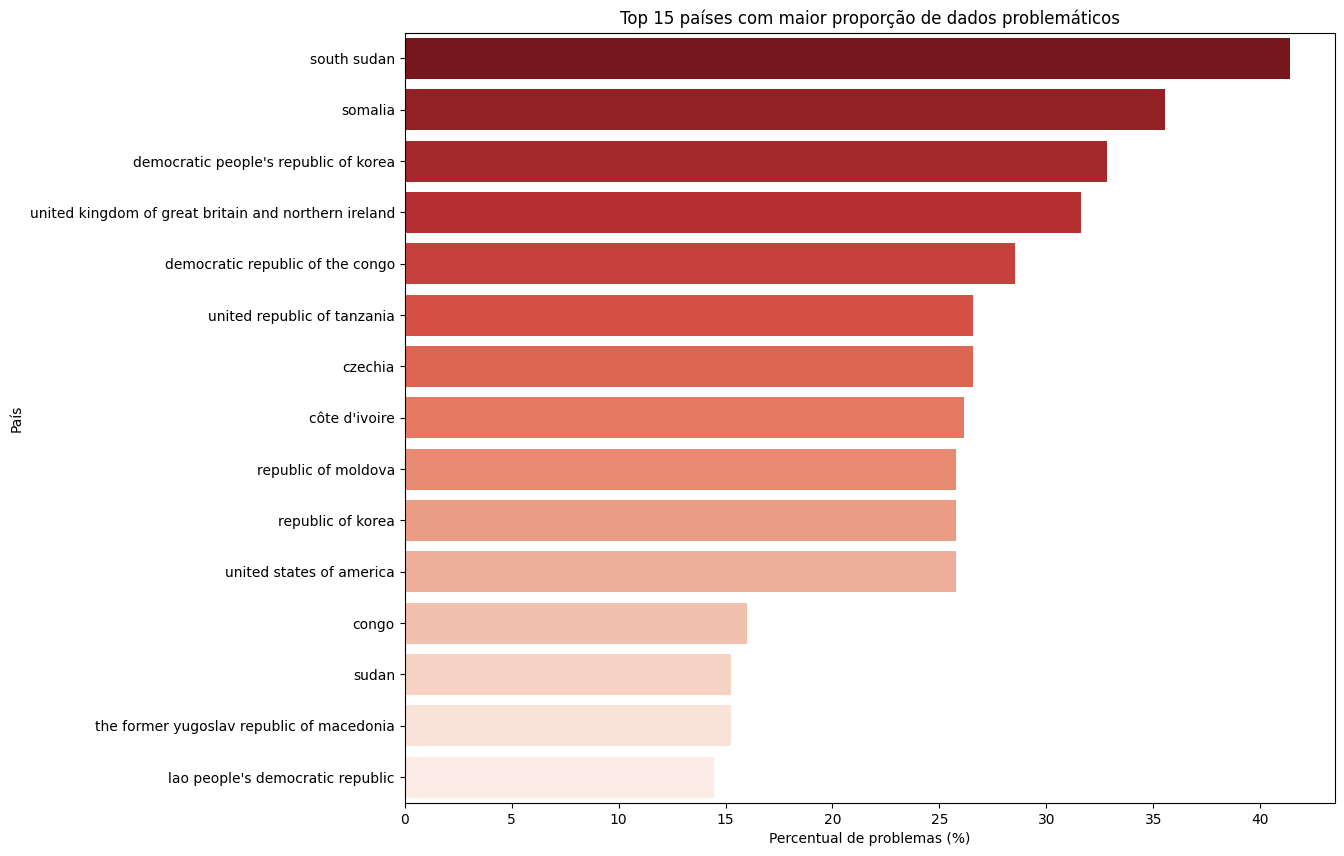

In [56]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=tabela_problemas.head(15), 
    x='perc_problemas', 
    y='country', 
    hue='country',
    palette='Reds_r',
    legend=False
    )
plt.title("Top 15 países com maior proporção de dados problemáticos")
plt.xlabel("Percentual de problemas (%)")
plt.ylabel("País")
plt.show()

Países com mais de 30% de valores problemáticos em uma variável não são elegíveis para imputação baseada em histórico próprio. A ausência de metadados geográficos inviabiliza imputação por similaridade regional.


In [57]:
df_filtered[df_filtered['country']=='south sudan']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1615,south sudan,2013,developing,56.4,345.0,26,NaN,NaN,40,5.0,2.62,45.0,3.6,1186.113,1.118e+06,NaN,NaN,0.417,4.9
1631,south sudan,2014,developing,56.6,343.0,26,NaN,NaN,39,44.0,2.74,39.0,3.5,1151.862,1.154e+06,NaN,NaN,0.421,4.9
1719,south sudan,2012,developing,56.0,347.0,26,NaN,NaN,40,64.0,2.77,59.0,3.8,958.456,1.818e+06,NaN,NaN,0.419,4.9
2776,south sudan,2015,developing,57.3,332.0,26,NaN,31.0,39,41.0,NaN,31.0,3.4,758.726,1.188e+07,NaN,NaN,0.421,4.9
2777,south sudan,2011,developing,55.4,355.0,27,NaN,NaN,41,66.0,NaN,61.0,3.9,176.971,1.449e+06,NaN,NaN,0.429,4.9
2778,south sudan,2010,developing,55.0,359.0,27,NaN,NaN,41,NaN,NaN,NaN,4.0,1562.239,1.672e+05,NaN,NaN,0.000,0.0
2779,south sudan,2009,developing,54.3,369.0,27,NaN,NaN,42,NaN,NaN,NaN,4.2,1264.790,9.677e+05,NaN,NaN,0.000,0.0
2780,south sudan,2008,developing,53.6,377.0,27,NaN,NaN,42,NaN,NaN,NaN,4.2,1678.712,9.263e+06,NaN,NaN,0.000,0.0
2781,south sudan,2007,developing,53.1,381.0,27,NaN,NaN,43,NaN,NaN,NaN,4.2,NaN,8.857e+04,NaN,NaN,0.000,0.0
2782,south sudan,2006,developing,52.5,383.0,28,NaN,NaN,43,NaN,NaN,NaN,4.1,NaN,8.468e+06,NaN,NaN,0.000,0.0


A inspeção do South Sudan confirma concentração de dados ausentes nas mesmas variáveis ao longo de toda a série temporal, caracterizando comprometimento estrutural da qualidade dos dados.

### **3.3.2 - Identificação de países críticos**

In [ ]:
def checar_dados_paises_variaveis(df, limites):
    """
    Avalia a qualidade dos dados por país para cada variável em relação a limites definidos.

    Para cada variável especificada em `limites`, a função calcula:
    - Percentual de valores nulos.
    - Percentual de valores abaixo do limite mínimo (quando definido).
    - Percentual de valores acima do limite máximo (quando definido).
    Esses percentuais são calculados por país e retornados em uma tabela consolidada.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo os dados, incluindo a coluna 'country'.
    limites : dict
        Dicionário no formato {variável: (min_val, max_val)}.
        Use None para ignorar limite mínimo ou máximo.

    Retorna
    -------
    pandas.DataFrame
        DataFrame com uma coluna para cada variável avaliada e uma linha por país,
        contendo o percentual de problemas (valores nulos ou fora dos limites) em cada variável.
    """

    resultados = []

    for var, (min_val, max_val) in limites.items():

        flag_problema = (
            df[var].isna()
            | ((df[var] < min_val) if min_val is not None else False)
            | ((df[var] > max_val) if max_val is not None else False)
        )

        percentual = (
            flag_problema
            .groupby(df['country'], observed=True)
            .mean()
            * 100
        )

        resultados.append(percentual.rename(var))

    return pd.concat(resultados, axis=1)

checar_dados_paises_variaveis(df_filtered, limites)


,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
country,,,,,,,,,,,,,,,,
afghanistan,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
albania,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
algeria,0.0,0.0,0.0,6.25,25.00,0.0,0.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angola,0.0,0.0,0.0,6.25,43.75,0.0,0.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
antigua and barbuda,0.0,0.0,0.0,6.25,6.25,0.0,0.0,6.25,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
venezuela (bolivarian republic of),0.0,0.0,0.0,6.25,0.00,0.0,0.0,6.25,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0
viet nam,0.0,0.0,0.0,6.25,18.75,0.0,0.0,6.25,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0
yemen,0.0,0.0,0.0,6.25,0.00,0.0,0.0,6.25,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0


In [59]:
tabela_problemas = checar_dados_paises_variaveis(df_filtered, limites)
tabela_problemas['perc_problemas'] = tabela_problemas.mean(axis=1)
tabela_problemas['country'] = tabela_problemas.index
tabela_problemas

,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,perc_problemas,country
country,,,,,,,,,,,,,,,,,,
afghanistan,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,afghanistan
albania,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,albania
algeria,0.0,0.0,0.0,6.25,25.00,0.0,0.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.344,algeria
angola,0.0,0.0,0.0,6.25,43.75,0.0,0.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.516,angola
antigua and barbuda,0.0,0.0,0.0,6.25,6.25,0.0,0.0,6.25,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,7.422,antigua and barbuda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
venezuela (bolivarian republic of),0.0,0.0,0.0,6.25,0.00,0.0,0.0,6.25,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,13.281,venezuela (bolivarian republic of)
viet nam,0.0,0.0,0.0,6.25,18.75,0.0,0.0,6.25,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,14.453,viet nam
yemen,0.0,0.0,0.0,6.25,0.00,0.0,0.0,6.25,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,13.281,yemen


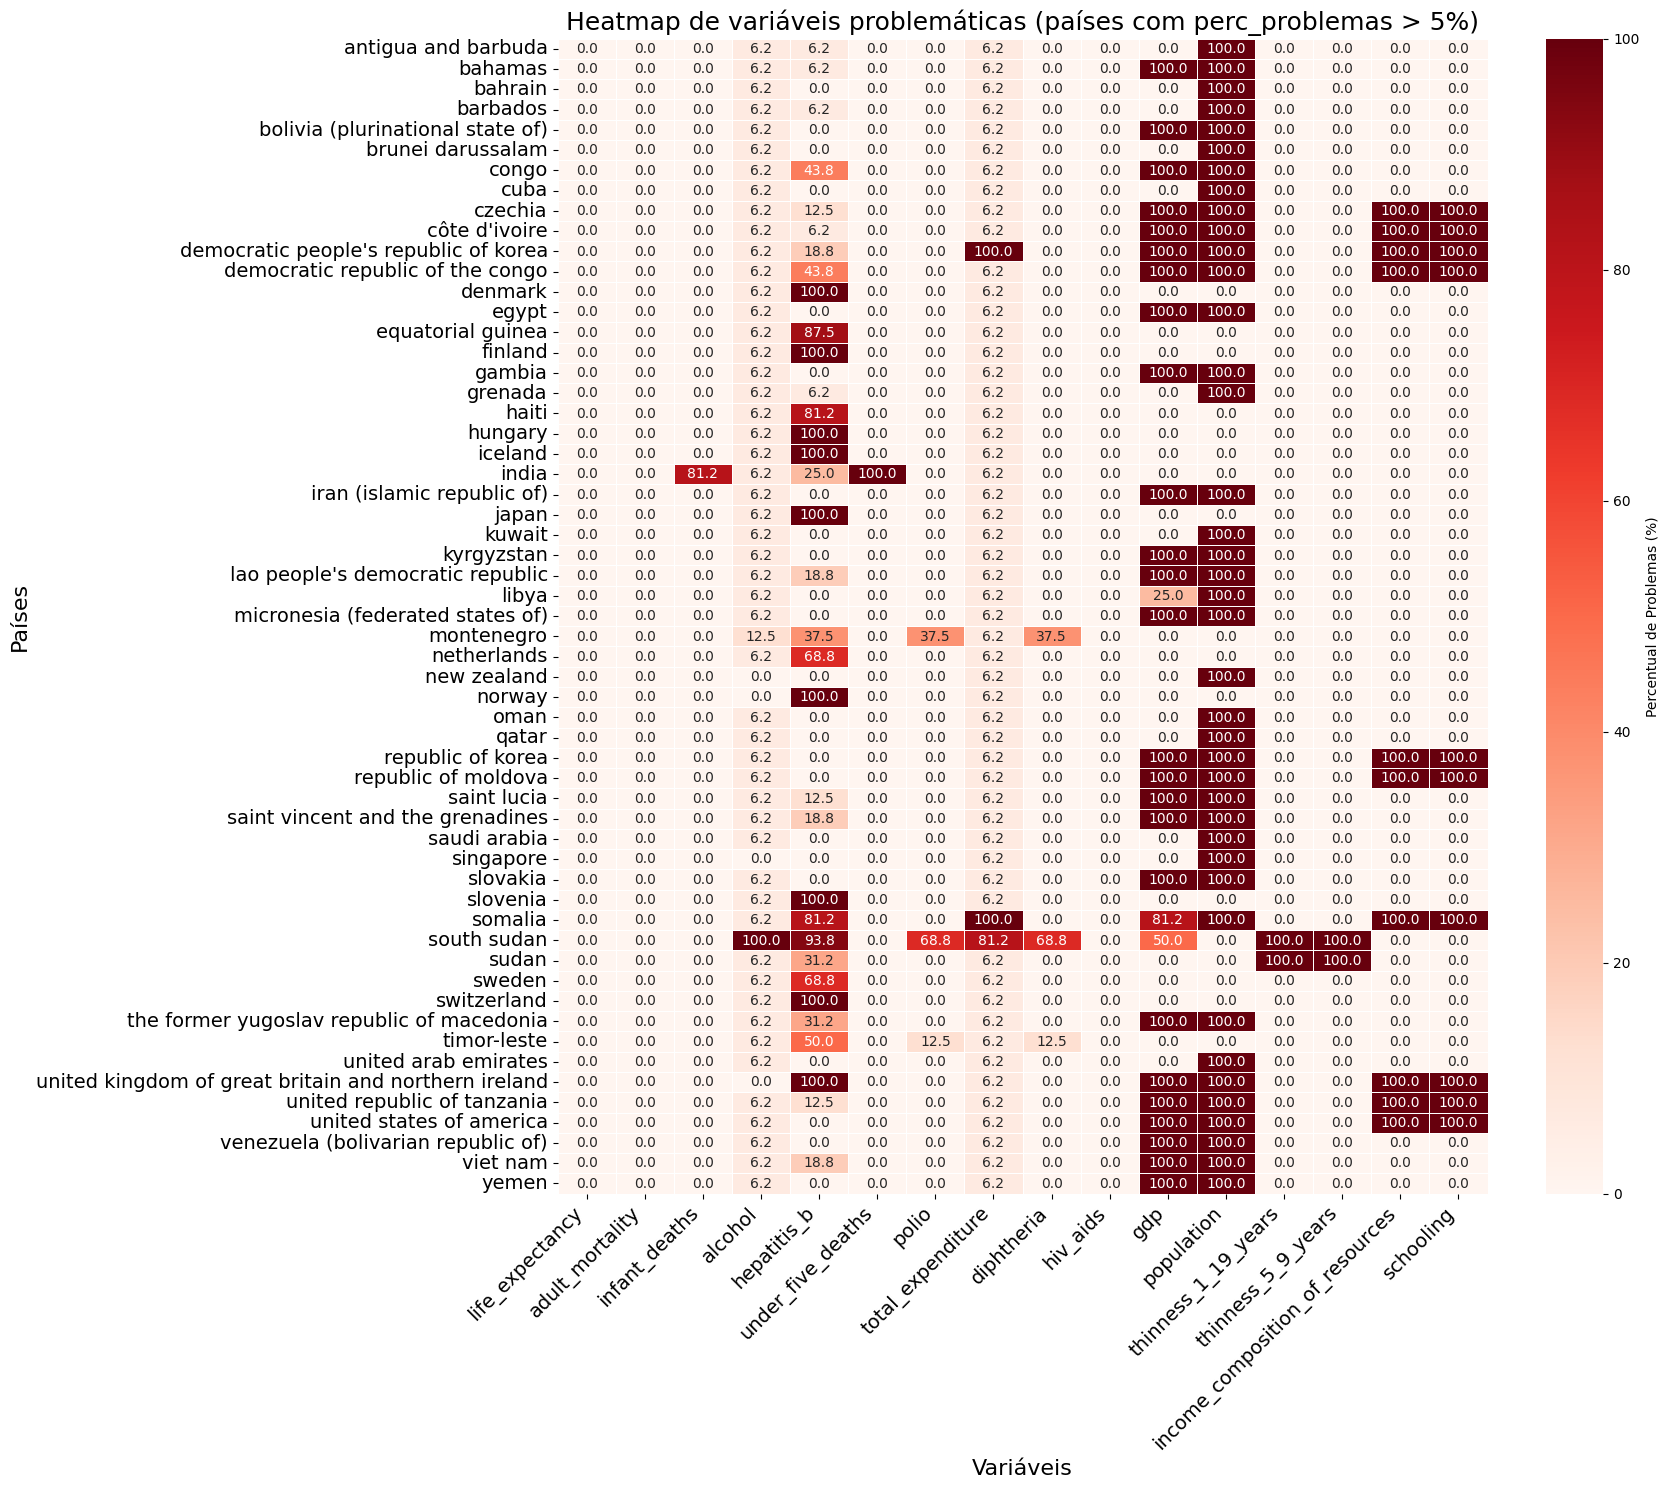

In [ ]:

tabela_problemas = checar_dados_paises_variaveis(df_filtered, limites)
tabela_problemas['perc_problemas'] = tabela_problemas.mean(axis=1)
tabela_problemas['country'] = tabela_problemas.index

# Identificar países com mais de 5% de problemas no geral
paises_selecionados = (
    tabela_problemas
    .loc[tabela_problemas['perc_problemas'] > 5, 'country']
    .unique()
    .tolist()
)

df_problemas = tabela_problemas.loc[tabela_problemas.index.isin(paises_selecionados)]

colunas_variaveis_originais = list(limites.keys())
heatmap_data = df_problemas[colunas_variaveis_originais]

plt.figure(figsize=(15,15))
sns.heatmap(
    heatmap_data,
    cmap="Reds",
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Percentual de Problemas (%)'}
)
plt.title("Heatmap de variáveis problemáticas (países com perc_problemas > 5%)", fontsize=18)
plt.xlabel("Variáveis", fontsize=16)
plt.ylabel("Países", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

**Visualização da concentração de dados problemáticos**

Foi gerado um heatmap considerando apenas países com mais de 5% de ocorrências problemáticas, com o objetivo de reduzir poluição visual e destacar padrões relevantes de inconsistência.


Como o escopo deste projeto é a limpeza e organização dos dados disponíveis, não será realizada complementação externa por fontes oficiais nesta etapa.

### **3.3.3 - Comparação estatística entre grupos de países**

In [61]:
tabela_problemas = checar_dados_paises_variaveis(df_filtered, limites)
tabela_problemas = tabela_problemas.astype(float)

paises_criticos = tabela_problemas[tabela_problemas.ge(30).any(axis=1)]

lista_paises_criticos = paises_criticos.index.tolist()


print("\nLista de países críticos: ")
print(lista_paises_criticos)

n_paises_criticos = len(lista_paises_criticos)
print(f"\nNúmero de países críticos: {n_paises_criticos}")


Lista de países críticos: 
['angola', 'antigua and barbuda', 'bahamas', 'bahrain', 'barbados', 'bolivia (plurinational state of)', 'brunei darussalam', 'burkina faso', 'cambodia', 'cameroon', 'central african republic', 'chad', 'chile', 'congo', 'croatia', 'cuba', 'czechia', "côte d'ivoire", "democratic people's republic of korea", 'democratic republic of the congo', 'denmark', 'djibouti', 'egypt', 'equatorial guinea', 'ethiopia', 'finland', 'gabon', 'gambia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'haiti', 'hungary', 'iceland', 'india', 'iran (islamic republic of)', 'ireland', 'japan', 'kuwait', 'kyrgyzstan', "lao people's democratic republic", 'liberia', 'libya', 'mauritania', 'micronesia (federated states of)', 'montenegro', 'namibia', 'netherlands', 'new zealand', 'niger', 'nigeria', 'norway', 'oman', 'qatar', 'republic of korea', 'republic of moldova', 'saint lucia', 'saint vincent and the grenadines', 'saudi arabia', 'sierra leone', 'singapore', 'slovakia', 'slovenia

In [62]:
df_criticos = df_filtered[df_filtered['country'].isin(lista_paises_criticos)]
criticos = len(df_criticos['country'].unique())
print(f"Número de países no DataFrame críticos : {criticos}")

df_outros = df_filtered[~df_filtered['country'].isin(lista_paises_criticos)]
nao_criticos = len(df_outros['country'].unique())
print(f"\nNúmero de países no DataFrame não críticos : {nao_criticos}")

Número de países no DataFrame críticos : 82

Número de países no DataFrame não críticos : 101


In [63]:
print("Estatísticas descritivas - Países críticos: ")
print(df_criticos['life_expectancy'].describe())


print("\nEstatísticas descritivas - Outros países: ")
print(df_outros['life_expectancy'].describe())

Estatísticas descritivas - Países críticos: 
count    1312.000
mean       68.276
std        10.624
min        36.300
25%        59.000
50%        71.800
75%        76.500
max        89.000
Name: life_expectancy, dtype: float64

Estatísticas descritivas - Outros países: 
count    1616.000
mean       69.995
std         8.452
min        43.100
25%        65.500
50%        72.150
75%        75.000
max        89.000
Name: life_expectancy, dtype: float64


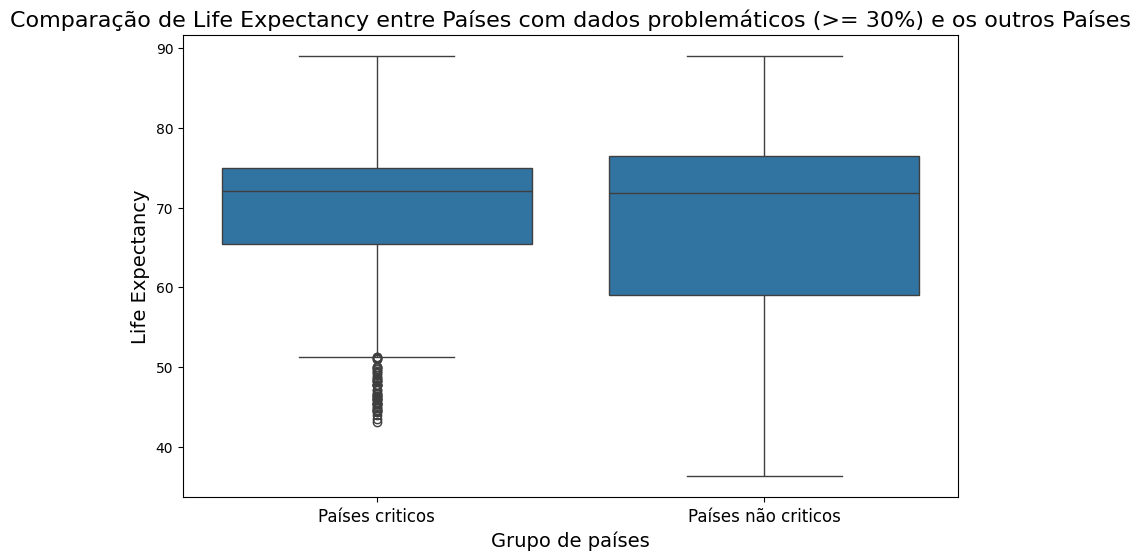

In [64]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x=df_filtered['country'].isin(lista_paises_criticos), y='life_expectancy')
plt.xticks([0, 1], ['Países criticos', 'Países não criticos'], fontsize=12)
plt.xlabel('Grupo de países', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.title('Comparação de Life Expectancy entre Países com dados problemáticos (>= 30%) e os outros Países', fontsize=16)
plt.show()

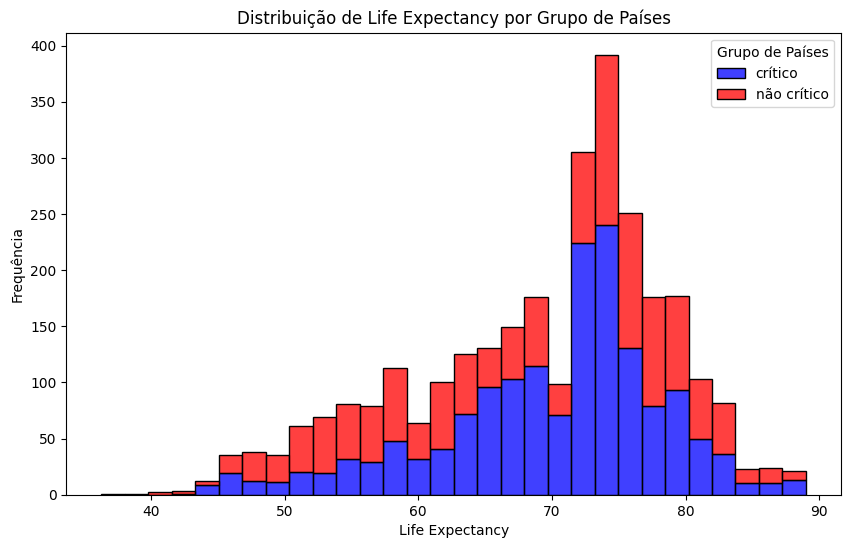

In [65]:
# Histograma


df_filtered['grupo_pais'] = df_filtered['country'].apply(
    lambda x: 'critico' if x in lista_paises_criticos else 'nao_critico'
)

plt.figure(figsize=(10,6))
sns.histplot(
    data=df_filtered,
    x='life_expectancy',
    hue='grupo_pais',        # usa a coluna categórica
    multiple='stack',
    palette={'critico':'red','nao_critico':'blue'}  # indicando cores da legenda
)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequência')
plt.title('Distribuição de Life Expectancy por Grupo de Países')
plt.legend(title='Grupo de Países', labels=['crítico','não crítico'])
plt.show()


In [ ]:
# Teste entre os dois grupos com a variável life expectancy

life_prob = df_criticos['life_expectancy'].dropna()
life_outros = df_outros['life_expectancy'].dropna()

# Teste t de Student (assumindo distribuições aproximadamente normais)
t_stat, p_val_t = ttest_ind(life_prob, life_outros, equal_var=False)

# Teste de Mann-Whitney (não paramétrico, mais robusto se distribuições não forem normais)
u_stat, p_val_u = mannwhitneyu(life_prob, life_outros, alternative='two-sided')

print("Teste t de Student:")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val_t:.5f}")

print("\nTeste de Mann-Whitney:")
print(f"U-statistic = {u_stat:.3f}, p-value = {p_val_u:.5f}")


Teste t de Student:
t-statistic = -4.764, p-value = 0.00000

Teste de Mann-Whitney:
U-statistic = 1008502.500, p-value = 0.02333


### **3.3.4 - Critério de exclusão**

**Exclusão de Países Críticos**

**Objetivo**
Identificar países com comprometimento severo de qualidade de dados e decidir sobre sua permanência na base.

**Resultados**
Países com ≥ 30% de dados problemáticos apresentaram diferenças estatisticamente significativas em life expectancy:

* Welch’s t-test: p < 0.001

* Mann–Whitney: p ≈ 0.023

* Distribuições mais dispersas e medianas menores

**Interpretação**
Esses países apresentam elevada instabilidade nas séries e risco de viés analítico.
A análise se restringe à qualidade observada nos dados disponíveis.

**Decisão**
Países críticos foram removidos para preservar consistência estatística e reduzir distorção por imputação.

In [68]:
df_filtered = df_filtered[~df_filtered['country'].isin(lista_paises_criticos)].copy()

# Exibir o número de países presents no DataFrame após a exclusão dos países problemáticos
print('Número de países presentes no DataFrame df_filtrado após operações de exclusão:')
print(len(df_filtered['country'].unique()))

Número de países presentes no DataFrame df_filtrado após operações de exclusão:
101


### **3.3.5 - Base final e verificação de consistência**

In [69]:
colunas_auxiliares_excluir = df_filtered.columns[df_filtered.columns.str.startswith('problema_')]

df_filtered.drop(columns=colunas_auxiliares_excluir, inplace=True)
df_filtered = df_filtered.drop(columns=['grupo_pais'])

print("\nValores Faltantes (NaNs) restantes por coluna: ")
print((df_filtered.isnull().sum()).sort_values(ascending=False))


Valores Faltantes (NaNs) restantes por coluna: 
total_expenditure                  102
hepatitis_b                        101
alcohol                             99
gdp                                 10
population                           4
country                              0
year                                 0
status                               0
adult_mortality                      0
infant_deaths                        0
life_expectancy                      0
polio                                0
under_five_deaths                    0
hiv_aids                             0
diphtheria                           0
thinness_1_19_years                  0
thinness_5_9_years                   0
income_composition_of_resources      0
schooling                            0
dtype: int64


In [70]:
nova_tabela_qualidade = checar_dados_pais(df_filtered, limites)
display(nova_tabela_qualidade)

,country,valores_nulos,valores_fora,total_problemas,perc_problemas
29,eritrea,12,0,12,4.688
40,iraq,9,0,9,3.516
14,bosnia and herzegovina,6,0,6,2.344
18,burundi,6,0,6,2.344
30,estonia,6,0,6,2.344
...,...,...,...,...,...
93,turkey,2,0,2,0.781
99,vanuatu,2,0,2,0.781
100,zimbabwe,2,0,2,0.781
0,afghanistan,0,0,0,0.000


In [71]:
n_fora = nova_tabela_qualidade['valores_fora'].sum()
print(f'Foram identificados {n_fora} valores fora dos intervalos estabelecidos')

Foram identificados 0 valores fora dos intervalos estabelecidos


In [72]:
n_nulos = nova_tabela_qualidade['valores_nulos'].sum()
print(f'Foram identificados {n_nulos} valores nulos')

Foram identificados 316 valores nulos


Não há mais valores fora dos intervalos estabelecidos para as variáveis, no entanto, ainda há países com dados nulos em algumas variáveis.

Próximo passo: Explorar os países com dados nulos

In [ ]:
perc_nulos_por_pais = df_filtered.groupby('country', observed=True).apply(
    lambda g: g.isnull().mean(), include_groups=False
    )

paises_com_nulos_series = perc_nulos_por_pais[perc_nulos_por_pais > 0].any(axis=1)

paises_com_nulos_filtrados = paises_com_nulos_series[paises_com_nulos_series]

n_nulos_paises = len(paises_com_nulos_filtrados)
print(f'O DataFrame df_filtered ainda contém {n_nulos_paises} países com algum valor nulo')

O DataFrame df_filtered ainda contém 99 países com algum valor nulo


**Tratamento de Países com Baixa Proporção de Dados Nulos**

**Objetivo**
Definir o tratamento adequado para países que ainda apresentam ausência parcial de dados.

**Resultados**
Após a exclusão dos países críticos, observam-se lacunas pontuais em algumas variáveis para países remanescentes.

**Interpretação**
A baixa incidência de valores ausentes não compromete a estrutura estatística das séries.
A remoção desses países causaria perda desnecessária de informação válida.

**Decisão**
Valores ausentes serão imputados utilizando métodos estatísticos apropriados, preservando a integridade do conjunto de dados.

## **4 - Imputação de dados**

## **4.1 - Contexto e Estratégia Geral**
**Objeivo**
Completar dados ausents preservando a estrutura temporal e as características específicas de cada país. 

**Contexto**
Países com mais de 30% de dados problemáticos foram removidos anteriormente.
Restaram apenas lacunas pontuais em variáveis numéricas contínuas.


## **4.2 - Imputação por Interpolação Temporal**
**Variáveis imputadas por interpolação:**
- hepatitis_b
- total_expenditure
- alcohol
- gdp
- population

**Justificativa**
* Variáveis contínuas e temporais.
* Ausência localizada.
* Suavidade temporal mantida.
* Ausência de distorções globais (média geral não usada).

In [74]:
# Variáveis contínuas com imputação temporal
variaveis_com_nulos = [
    'hepatitis_b', 
    'total_expenditure', 
    'alcohol', 
    'gdp', 
    'population']
print(variaveis_com_nulos)

['hepatitis_b', 'total_expenditure', 'alcohol', 'gdp', 'population']


In [ ]:

def imputar_interpolacao(df, colunas, grupo='country', metodo='linear'):
    """
    Imputa valores ausentes em variáveis numéricas contínuas via interpolação temporal,
    realizada dentro de cada grupo definido.

    A função ordena os dados pela coluna 'year' e aplica interpolação em cada grupo
    (por padrão, cada país). Após a imputação, imprime a quantidade de valores ausentes
    restantes em cada variável.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo os dados originais.
    colunas : list of str
        Lista de nomes das variáveis numéricas contínuas a serem imputadas.
    grupo : str, default='country'
        Nome da coluna usada para agrupar os dados antes da interpolação.
    metodo : str, default='linear'
        Método de interpolação aceito pelo pandas (ex.: 'linear', 'polynomial', 'spline').

    Retorna
    -------
    pandas.DataFrame
        DataFrame com os valores imputados por interpolação.
    """

    df = df.copy()

    for col in colunas:
        df[col] = (
            df.sort_values('year')
              .groupby(grupo, observed=True)[col]
              .transform(lambda x: x.interpolate(method=metodo, limit_direction='both'))
        )

        print(f"Valores ausentes restantes em '{col}': {df[col].isna().sum()}")

    return df


df_imputed = imputar_interpolacao(df_filtered, variaveis_com_nulos)

Valores ausentes restantes em 'hepatitis_b': 0
Valores ausentes restantes em 'total_expenditure': 0
Valores ausentes restantes em 'alcohol': 0
Valores ausentes restantes em 'gdp': 0
Valores ausentes restantes em 'population': 0


### **4.3 - Verificação**

In [76]:
df_imputed.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
hepatitis_b                        0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

**Resultado:** nenhuma variável contém valores ausentes após interpolação.

## **5 - Verificação de outlyers**

### **5.4.1 - Estatísticas descritivas**

In [77]:
pd.options.display.float_format = '{:.2f}'.format
df_imputed = pd.DataFrame(df_imputed)
df_imputed.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00,1616.00
mean,2007.50,70.00,163.22,21.67,4.52,79.58,28.49,85.03,5.98,85.51,1.91,5588.85,11056955.89,4.60,4.70,0.64,12.27
std,4.61,8.45,122.91,53.69,4.05,26.12,67.89,21.64,2.26,20.78,6.26,11367.28,28682060.08,4.37,4.48,0.19,2.80
min,2000.00,43.10,1.00,0.00,0.01,2.00,0.00,5.00,1.10,5.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2003.75,65.50,78.00,0.00,0.68,75.00,1.00,83.00,4.48,83.00,0.10,462.04,182887.50,1.60,1.60,0.54,10.60
50%,2007.50,72.15,145.00,3.00,3.81,91.00,4.00,94.00,5.84,93.00,0.10,1678.97,1341652.00,2.80,2.90,0.68,12.40
75%,2011.25,75.00,217.00,21.00,7.32,96.00,25.00,97.00,7.49,97.00,0.40,4722.76,7385084.00,6.60,6.70,0.76,14.10
max,2015.00,89.00,723.00,490.00,17.87,99.00,608.00,99.00,13.73,99.00,50.60,119172.74,258162113.00,22.20,22.60,0.94,20.70


### **5.4.2 - Boxplots (visualização)**

In [78]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1616 entries, 2 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   country                          1616 non-null   category
 1   year                             1616 non-null   int64   
 2   status                           1616 non-null   category
 3   life_expectancy                  1616 non-null   float64 
 4   adult_mortality                  1616 non-null   float64 
 5   infant_deaths                    1616 non-null   int64   
 6   alcohol                          1616 non-null   float64 
 7   hepatitis_b                      1616 non-null   float64 
 8   under_five_deaths                1616 non-null   int64   
 9   polio                            1616 non-null   float64 
 10  total_expenditure                1616 non-null   float64 
 11  diphtheria                       1616 non-null   float64 
 12  hiv_aids   

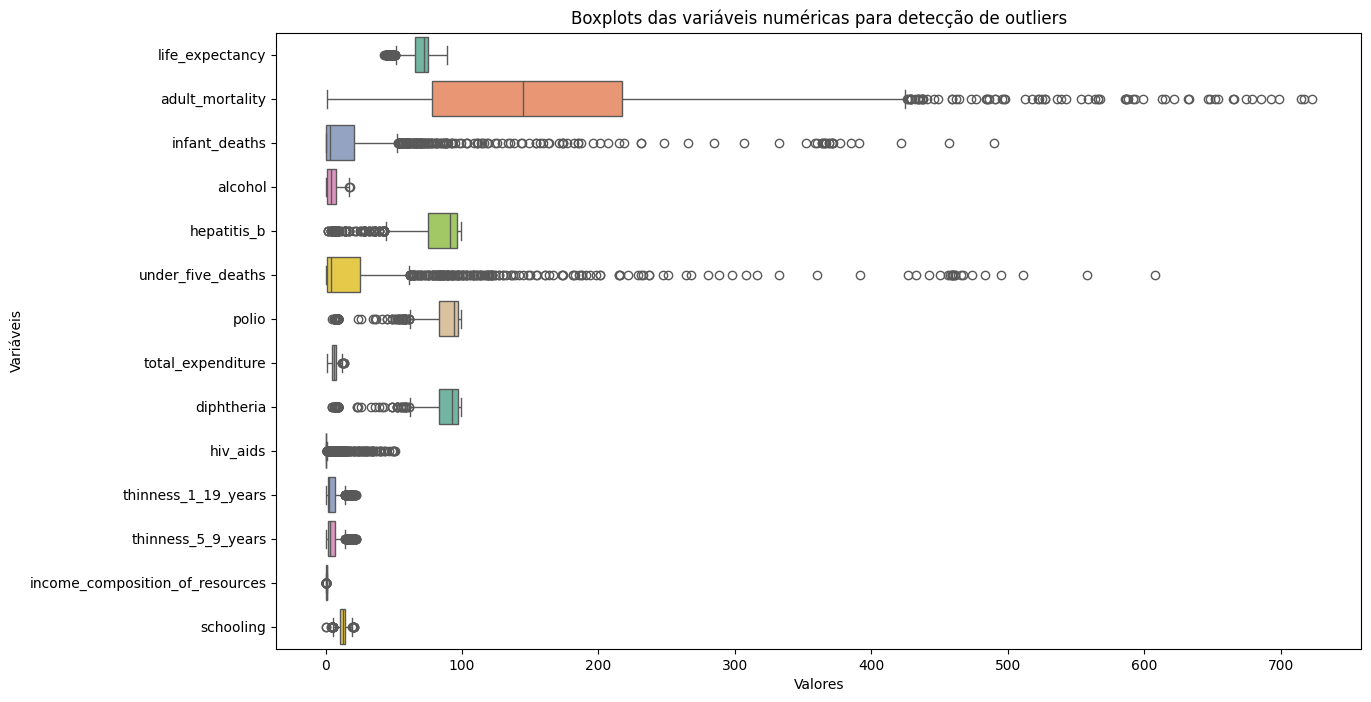

In [79]:
# Separar variáveis population e gdp apenas para facilitar a visualização
df_num = df_imputed.select_dtypes(include=['int64', 'float64']).drop(columns=['year'])
df_numerico_reduzido = df_num.drop(columns=['population', 'gdp'])


plt.figure(figsize=(14,8))
sns.boxplot(data=df_numerico_reduzido, orient='h', palette='Set2')
plt.title('Boxplots das variáveis numéricas para detecção de outliers')
plt.xlabel('Valores')
plt.ylabel('Variáveis')
plt.show()



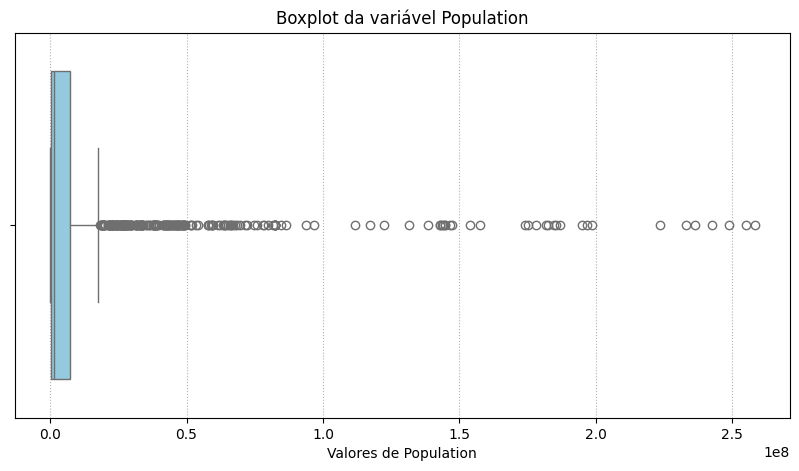

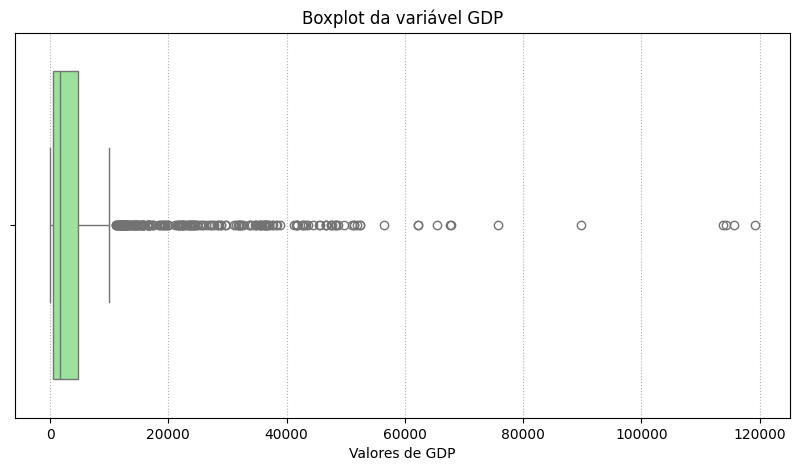

In [80]:
# Population
plt.figure(figsize=(10,5))
sns.boxplot(x=df_num['population'], color='skyblue')
plt.title('Boxplot da variável Population')
plt.xlabel('Valores de Population')
plt.grid(True, axis='x', linestyle=':')
plt.show()

# GDP
plt.figure(figsize=(10,5))
sns.boxplot(x=df_num['gdp'], color='lightgreen')
plt.title('Boxplot da variável GDP')
plt.xlabel('Valores de GDP')
plt.grid(True, axis='x', linestyle=':')
plt.show()


### **5.4.3 - Detecção de Outliers (QR)**

In [81]:
outliers = {}

for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    outliers[col] = df_num[(df_num[col] < limite_inf) | (df_num[col] > limite_sup)][col]

for var, valores in outliers.items():
    print(f"{var}: {len(valores)} outliers")


life_expectancy: 57 outliers
adult_mortality: 77 outliers
infant_deaths: 183 outliers
alcohol: 2 outliers
hepatitis_b: 187 outliers
under_five_deaths: 211 outliers
polio: 131 outliers
total_expenditure: 6 outliers
diphtheria: 113 outliers
hiv_aids: 293 outliers
gdp: 209 outliers
population: 244 outliers
thinness_1_19_years: 96 outliers
thinness_5_9_years: 96 outliers
income_composition_of_resources: 62 outliers
schooling: 41 outliers


### **5.4.4 - Decisão sobre Outliers**

**Interpretação**
Os valores extremos observados não são erros sistemáticos, mas refletem:
* desigualdade socioeconômica real,
* conflitos armados,
* epidemias,
* alta densidade populacional,
* economias desenvolvidas.

**Decisão**

🔹 Nenhum outlier estatístico plausível foi removido.

🔹 Apenas valores estruturalmente inválidos foram tratados.

## **6 - Tratamento de Valores Zero**

## **6.1 - Classificação dos zeros**
**Zeros plausíveis (mantidos):**
* infant_deaths
* under_five_deaths
* hiv/aids
* alcohol

**Zeros incoerentes (tratados como ausentes):**
* schooling
* income_composition_of_resources
* gdp
* population
* hepatitis_b
* polio
* diphtheria
* total_expenditure

## **6.2 - Imputação de valores por meio da média para zeros**

In [169]:

def imputar_media_pais(df, colunas, grupo='country'):
    """
    Imputa valores ausentes em variáveis numéricas substituindo zeros por NaN
    e preenchendo pela média dentro de cada grupo (por padrão, cada país).

    A função percorre as colunas especificadas, substitui valores iguais a zero
    por NaN e, em seguida, aplica imputação pela média calculada dentro do grupo
    definido. Após a imputação, imprime a quantidade de valores ausentes restantes
    em cada variável.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo os dados originais.
    colunas : list of str
        Lista de nomes das variáveis numéricas a serem imputadas.
    grupo : str, default='country'
        Nome da coluna usada para agrupar os dados antes da imputação.

    Retorna
    -------
    pandas.DataFrame
        DataFrame com os valores imputados pela média do grupo.
    """
    df = df.copy()

    for col in colunas:
        df[col] = df[col].replace(0, pd.NA)

        df[col] = df.groupby(grupo, observed=True)[col].transform(
            lambda x: x.fillna(x.mean())
        )

        print(f"NaNs restantes em '{col}': {df[col].isna().sum()}")

    return df



variaveis_invalidas = [
   'schooling',
    'income_composition_of_resources',
    'gdp',
    'population',
    'hepatitis_b',
    'polio',
    'diphtheria',
    'total_expenditure'
]

df_imputed = imputar_media_pais(df_imputed, variaveis_invalidas)


NaNs restantes em 'schooling': 0
NaNs restantes em 'income_composition_of_resources': 0
NaNs restantes em 'gdp': 0
NaNs restantes em 'population': 0
NaNs restantes em 'hepatitis_b': 0
NaNs restantes em 'polio': 0
NaNs restantes em 'diphtheria': 0
NaNs restantes em 'total_expenditure': 0


### **6.3 - Verificação final**

In [83]:
df_imputed.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
hepatitis_b                        0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

✅ **Resultado:** base final sem dados ausentes.

##**Conclusão técnica:**

✅ Base pronta para modelagem

✅ Estrutura temporal preservada

✅ Outliers válidos respeitados

✅ Dados inválidos tratados

✅ Padronização metodológica aplicada


## **7 - Correlações e Distribuição da Expectativa de Vida**

**Mapa mundial da expectativa de vida (último ano disponível)**

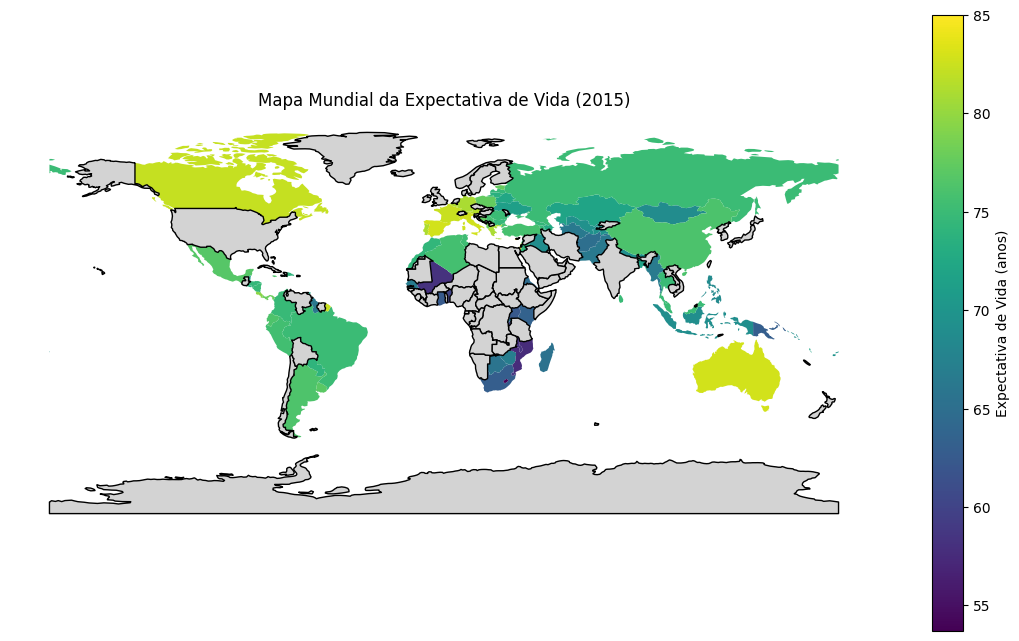

Total de países no dataset: 101
Total de países com dados no mapa: 91
Países do dataset que não apareceram no mapa (legível): ['cabo verde', 'comoros', 'kiribati', 'maldives', 'malta', 'mauritius', 'samoa', 'sao tome and principe', 'seychelles', 'tonga']
Países do dataset que não existem no shapefile: ['cabo verde', 'comoros', 'kiribati', 'maldives', 'malta', 'mauritius', 'samoa', 'sao tome and principe', 'seychelles', 'tonga']


In [ ]:

# Carregamento do shapefile-base 
mundo = gpd.read_file("C:/Portifolio/projeto_limpeza_de_dados/mapa/ne_110m_admin_0_countries.shp")

# Função de normalização para os nomes dos países 
def normalize(name: str) -> str:
    if pd.isna(name):
        return name
    s = name.lower().strip()
    s = s.replace("&", "and")
    s = s.replace("’", "")
    s = s.replace("'", "")
    s = re.sub(r"[^a-z0-9]", "", s)
    return s


mundo["name_key"] = mundo["NAME"].apply(normalize)

# Normalização e identificação do último ano da série de dados
ultimo_ano = df_imputed["year"].max()

life_map = (
    df_imputed[df_imputed["year"] == ultimo_ano]
    .groupby("country", observed=True)["life_expectancy"]
    .mean()
    .reset_index()
)

# Conversão para string para evitar FutureWarning
life_map["country"] = life_map["country"].astype(str)

life_map["country_key_raw"] = life_map["country"].apply(normalize)

# Dicionário de equivalências (no formato normalizado)
equivalencias = {
    "russianfederation": "russia",
    "dominicanrepublic": "dominicanrep",
    "solomonislands": "solomonis",
    "swaziland": "eswatini",
    "bosniaandherzegovina": "bosniaandherz",
}

# Garantir que a coluna usada no replace seja string
life_map["country_key_raw"] = life_map["country_key_raw"].astype(str)
life_map["country_key"] = life_map["country_key_raw"].replace(equivalencias)

# Merge por chaves normalizadas
mapa_mundi = mundo.merge(
    life_map,
    how="left",
    left_on="name_key",
    right_on="country_key"
)

# Plot com países sem dados visíveis 
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
mapa_mundi.plot(
    column="life_expectancy",
    cmap="viridis",
    legend=True,
    ax=ax,
    legend_kwds={"label": "Expectativa de Vida (anos)"},
    missing_kwds={"color": "lightgrey", "edgecolor": "black"}
)
plt.title(f"Mapa Mundial da Expectativa de Vida ({ultimo_ano})")
plt.axis("off")
plt.show()

# Validação 
paises_dataset_keys = set(life_map["country_key"])
paises_shape_keys = set(mundo["name_key"])

faltando_no_mapa_keys = paises_dataset_keys - set(
    mapa_mundi.loc[mapa_mundi["life_expectancy"].notna(), "name_key"]
)

inv_dataset = dict(zip(life_map["country_key"], life_map["country"]))
inv_shape   = dict(zip(mundo["name_key"], mundo["NAME"]))

faltando_legivel = sorted(inv_dataset[k] for k in faltando_no_mapa_keys if k in inv_dataset)

print("Total de países no dataset:", len(paises_dataset_keys))
print("Total de países com dados no mapa:", mapa_mundi["life_expectancy"].notna().sum())
print("Países do dataset que não apareceram no mapa (legível):", faltando_legivel)

ausentes_no_shape_keys = paises_dataset_keys - paises_shape_keys
ausentes_no_shape_legivel = sorted(inv_dataset[k] for k in ausentes_no_shape_keys if k in inv_dataset)
print("Países do dataset que não existem no shapefile:", ausentes_no_shape_legivel)


**Correlação entre varíaveis usando a média por país**

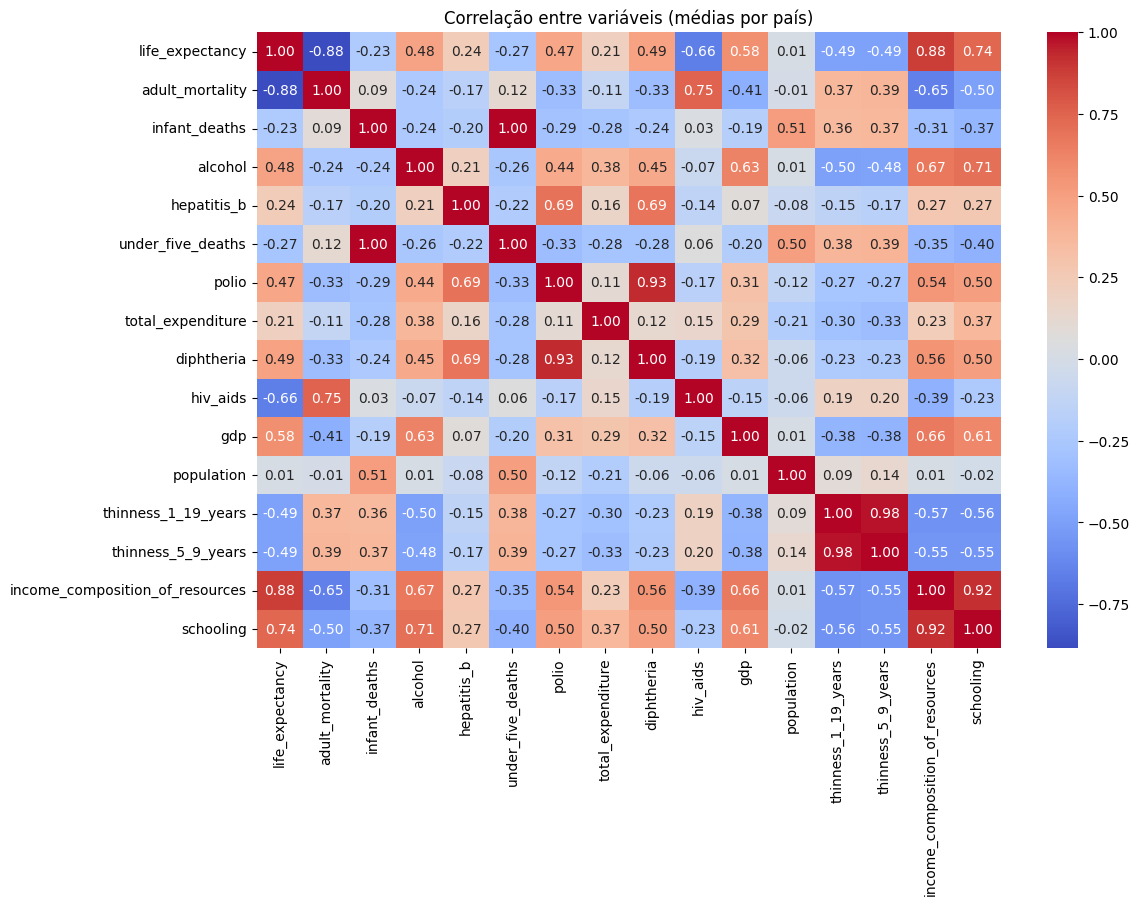

In [147]:
# Agregar por país (média ao longo dos anos)
df_pais_media = df_imputed.groupby("country", observed=True).mean(numeric_only=True)

df_pais_media = df_pais_media.drop(columns=['year'], errors='ignore')

# Matriz de correlação
corr = df_pais_media.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis (médias por país)")
plt.show()


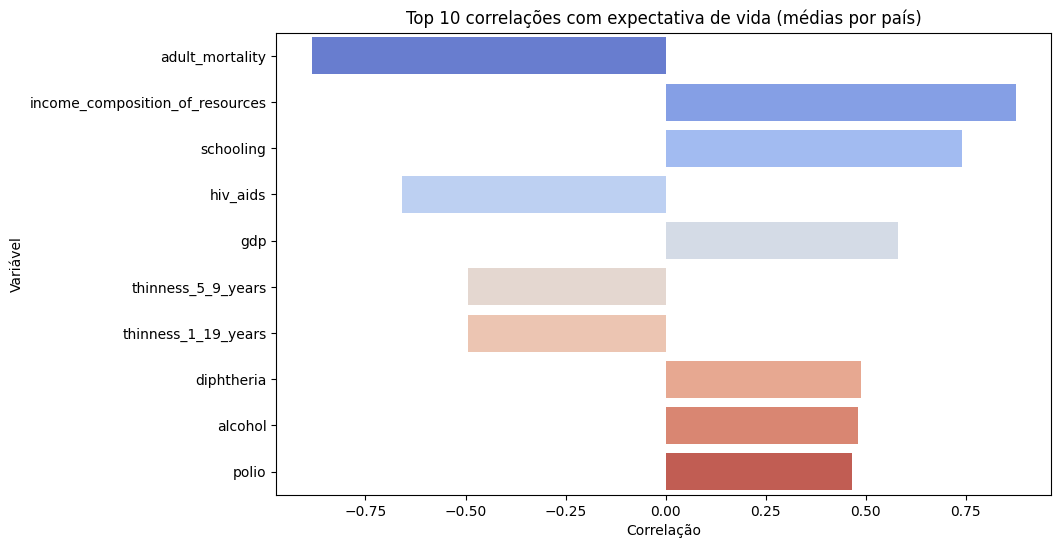

In [ ]:

df_country_mean = df_imputed.groupby("country", observed=True).mean(numeric_only=True)

df_country_mean = df_country_mean.drop(columns=["year"], errors="ignore")

corr_target = df_country_mean.corr()["life_expectancy"].drop("life_expectancy")

top_corr = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)[:10]

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_corr.values, 
    y=top_corr.index,
    hue=top_corr.index, 
    palette="coolwarm",
    legend=False
)
plt.title("Top 10 correlações com expectativa de vida (médias por país)")
plt.xlabel("Correlação")
plt.ylabel("Variável")
plt.show()


- Variáveis ligadas à saúde e educação (adult_mortality, schooling, income_composition_of_resources) exibiram correlação mais forte com a expectativa de vida do que o PIB. 
- Esses resultados sugerem que fatores sociais e de saúde pública são mais determinantes, e servirão como base para a escolha de variáveis em análises futuras.

In [160]:
def plota_correlacao(df, col_x, col_y, min_obs=5):
    """
    Calcula e plota a distribuição das correlações entre duas variáveis
    para cada país no dataset.

    Parâmetros:
    - df: DataFrame com os dados
    - col_x: nome da primeira coluna (string)
    - col_y: nome da segunda coluna (string)
    - min_obs: número mínimo de observações não nulas para calcular a correlação
    """
    correlations =[]
    for country, group in df.groupby('country', observed=True):
        if group[col_x].notna().sum() > min_obs and group[col_y].notna().sum() > min_obs:
            if group[col_x].nunique() > 1 and group[col_y].nunique() > 1:
                corr = group[col_x].corr(group[col_y])
                if pd.notnull(corr):
                    correlations.append(corr)

    plt.figure(figsize=(8,5))
    sns.histplot(correlations, bins=20, kde=True, color='skyblue')
    plt.title(f'Distribuição das correlações {col_x} vs {col_y} por país')
    plt.xlabel('Correlação')
    plt.ylabel('Número de países')
    plt.show()

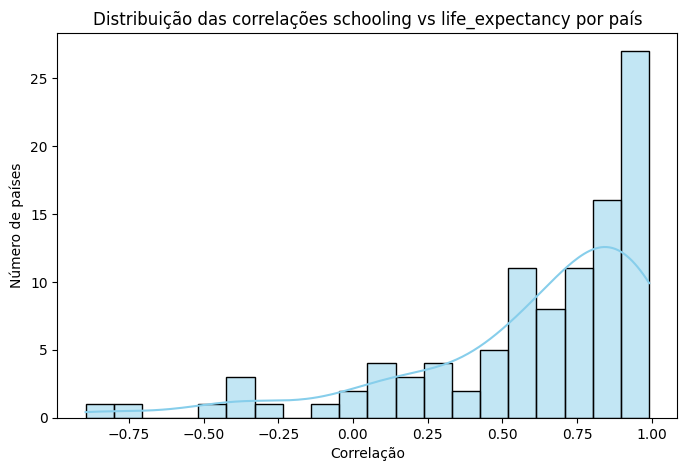

In [161]:
plota_correlacao(df_imputed, "schooling", "life_expectancy")

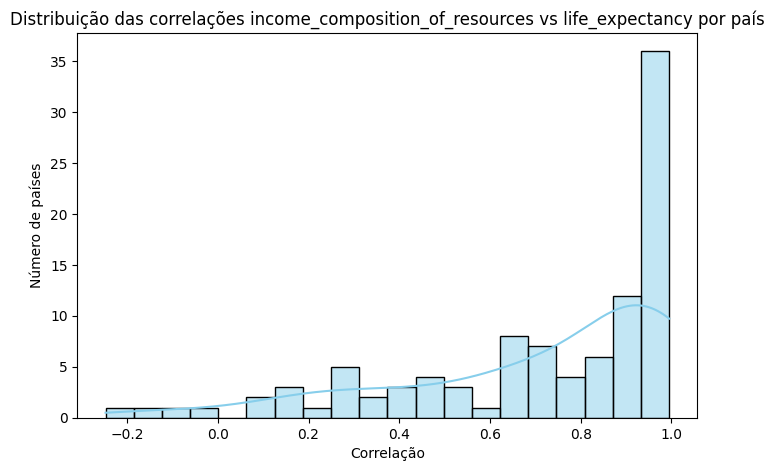

In [157]:
plota_correlacao(df_imputed, "income_composition_of_resources", "life_expectancy")

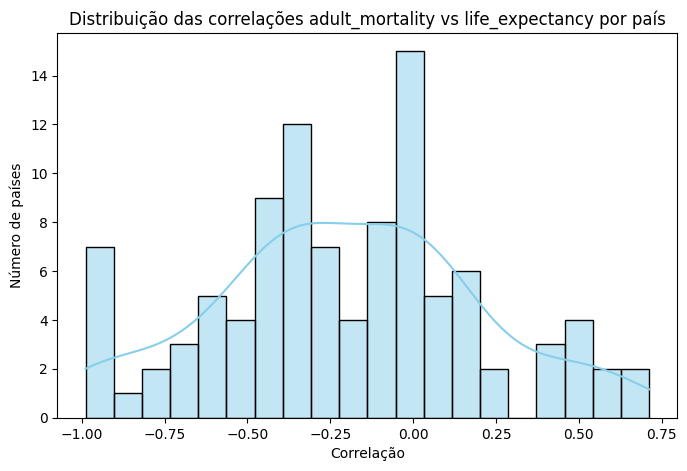

In [158]:
plota_correlacao(df_imputed, "adult_mortality", "life_expectancy")

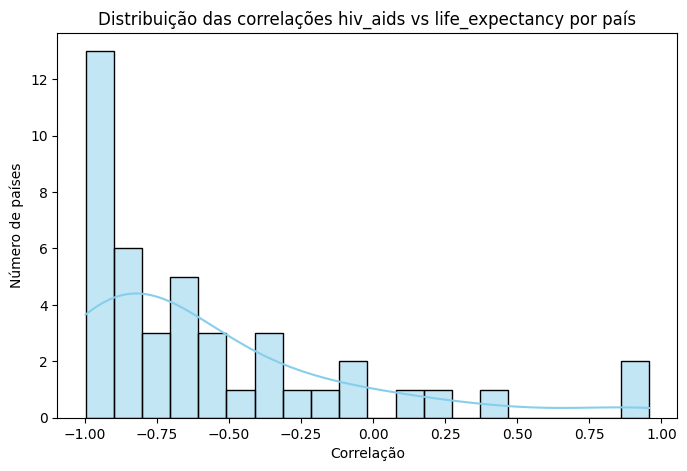

In [162]:
plota_correlacao(df_imputed, "hiv_aids", "life_expectancy")

## **8 - Exportação do Conjunto Final de Dados**

**Objetivo**

Persistir o dataframe final após todas as etapas de limpeza, imputação e validação.

**Formato de saída**

Será gerado um arquivo CSV sem o índice do DataFrame para uso em análises posteriores ou modelagem.

In [ ]:
# Salvar o dataset final
df_imputed.to_csv("life_expectancy_final.csv", index=False)

print("Arquivo 'life_expectancy_final.csv' salvo com sucesso.")

Arquivo 'life_expectancy_final.csv' salvo com sucesso.


# **9 - Conclusões e Próximos Passos**

## **Resumo da Fase de Limpeza e Preparação**

O projeto atingiu seu objetivo de limpar e padronizar o dataset de Expectativa de Vida, transformando um conjunto de dados complexo e com alta taxa de valores ausentes em uma base robusta e pronta para modelagem.

**Principais Desafios Técnicos Superados:**

1.  **Imputação Estratégica:** A maior dificuldade foi o tratamento de nulos em variáveis-chave. A decisão técnica de usar a **média** para variáveis contínuas (ex: `gdp`, `life_expectancy`) garantiu 100% de completude sem distorcer a média geral da variável.
2.  **Visualização Geográfica (Mapa Coroplético):** A criação do mapa de distribuição da Expectativa de Vida foi um desafio significativo, exigindo múltiplas etapas de preparação de dados:
    * **Série Temporal:** O *dataset* contém uma série temporal (16 anos). Para criar um *snapshot* geográfico significativo, foi necessário **filtrar os dados para o último ano disponível** e analisar correlações com a **média geral** dos indicadores.
    * **Incompatibilidade de Nomes:** Houve uma grande dificuldade em unir os dados limpos do DataFrame com os dados geográficos (*shapefile*), devido à **incompatibilidade dos nomes dos países** entre os dois arquivos, mesmo após a normalização.
    * **Solução:** O desafio foi superado através da criação de um **dicionário de mapeamento manual** para renomear e alinhar os países, e pela exclusão dos países presentes no DataFrame, mas ausentes no *shapefile*.

---

## 💡**Principais Insights da Análise Exploratória (EDA)**

A análise da matriz de correlação (heatmap) revelou padrões cruciais entre os fatores de saúde/socioeconômicos e a Expectativa de Vida:

* **Forte Correlação Positiva:** As variáveis **`schooling`** (anos de escolaridade) e **`income_composition_of_resources`** (composição da renda) apresentaram a correlação mais forte e positiva com a Expectativa de Vida.
* **Forte Correlação Negativa:** A **`adult_mortality`** (mortalidade adulta) e a taxa de **`hiv/aids`** são os fatores que mais consistentemente se correlacionam de forma negativa com a Expectativa de Vida.

---

## **Próximos Passos**

Esta limpeza serve como a fundação para a próxima fase do projeto:

1.  **Modelagem Preditiva:** Construção de um modelo de regressão para prever a expectativa de vida com base nos fatores limpos e validados.
2.  **Feature Engineering:** Criação de novas *features* (variáveis) para otimizar o poder preditivo do modelo.